# Comparing different datasets, NK-cells

- Comparisons were done using raw protein data
- focusing on NK-cells (or NK + T cells in Easigenomics dataset)

Datasets:

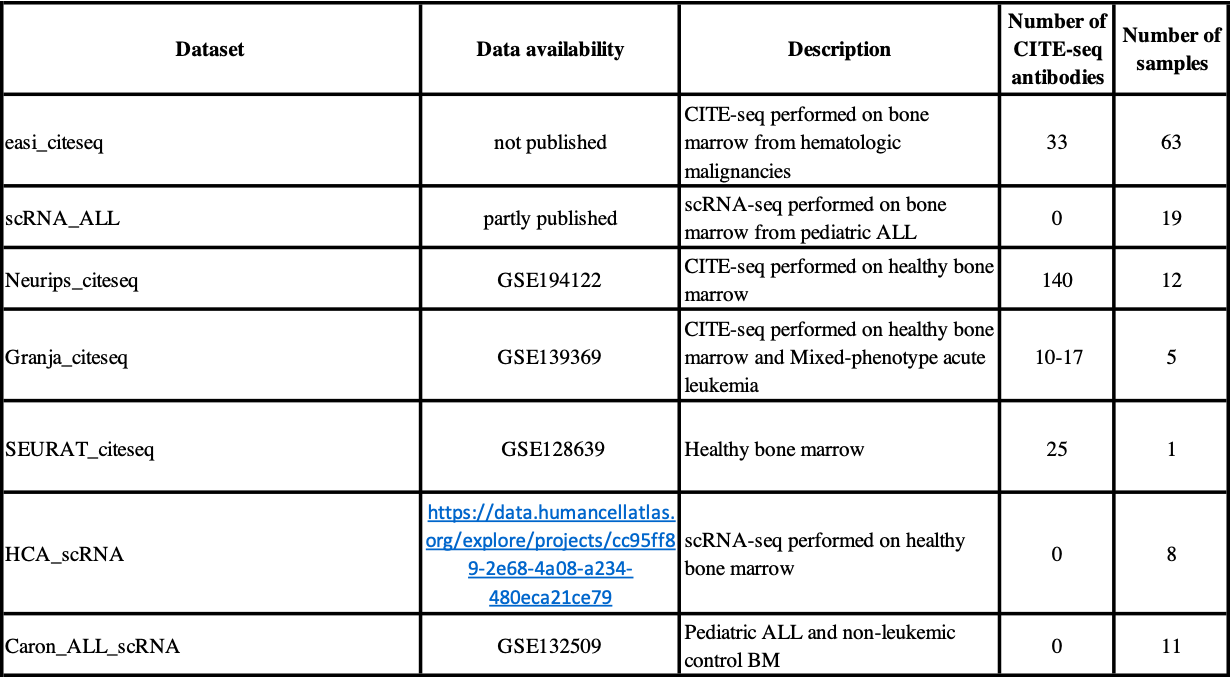

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/healthy_malig_!m.h5ad')



In [3]:
adata.obs['SAMPLE_SET'].unique().tolist()

['N', 'S', 'Granja', 'Caron', 'F', 'A']

In [4]:
adata.obs['batch_group']

GTAGTACCAATCCTTT-1-s4d1    Neurips
CTCAAGAGTCACAGAG-1-s4d1    Neurips
CTGTGGGTCATGCGGC-1-s4d1    Neurips
CGTGATAGTTATCTGG-1-s4d1    Neurips
AGATCCAAGATCGGTG-1-s4d1    Neurips
                            ...   
TTTGTCAGTCATGCAT-1-17        Caron
TTTGTCAGTGCTTCTC-1-17        Caron
TTTGTCAGTGGACGAT-1-17        Caron
TTTGTCATCAACGAAA-1-17        Caron
TTTGTCATCTAACTGG-1-17        Caron
Name: batch_group, Length: 298991, dtype: category
Categories (5, object): ['Caron', 'Easi', 'Granja', 'Neurips', 'Seurat']

### For Caron dataset, there is no CITE-seq results offered. 

In [5]:
adata

AnnData object with n_obs × n_vars = 298991 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

## Neurips 

In [6]:
#Neurips

adata_n=adata[adata.obs['batch_group'] == 'Neurips' ]

adata_n

View of AnnData object with n_obs × n_vars = 80998 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [7]:
adata_n.obs['DIAGNOSIS'] 

GTAGTACCAATCCTTT-1-s4d1    healthy
CTCAAGAGTCACAGAG-1-s4d1    healthy
CTGTGGGTCATGCGGC-1-s4d1    healthy
CGTGATAGTTATCTGG-1-s4d1    healthy
AGATCCAAGATCGGTG-1-s4d1    healthy
                            ...   
GTGGTTAGTCGAGTTT-1-s1d3    healthy
GCTACAACAGTGCGCT-1-s1d3    healthy
AACAAAGGTTGGTACT-1-s1d3    healthy
TGACAGTCATGGCTGC-1-s1d3    healthy
CTGGCAGGTCTCACGG-1-s1d3    healthy
Name: DIAGNOSIS, Length: 80998, dtype: category
Categories (1, object): ['healthy']

In [8]:
adata_n.obs['cell_type'].unique().tolist()

['NK',
 'CD8+ T CD69+ CD45RA+',
 'NK CD158e1+',
 'HSC',
 'CD14+ Mono',
 'B1 B IGKC+',
 'CD4+ T activated',
 'CD8+ T CD69+ CD45RO+',
 'G/M prog',
 'Naive CD20+ B IGKC-',
 'CD8+ T CD49f+',
 'Naive CD20+ B IGKC+',
 'CD4+ T naive',
 'CD8+ T naive',
 'CD4+ T activated integrinB7+',
 'cDC2',
 'gdT TCRVD2+',
 'CD8+ T TIGIT+ CD45RO+',
 'CD16+ Mono',
 'Erythroblast',
 'MAIT',
 'T reg',
 'gdT CD158b+',
 'Transitional B',
 'Proerythroblast',
 'CD8+ T CD57+ CD45RO+',
 'Plasmablast IGKC+',
 'ILC1',
 'Lymph prog',
 'ILC',
 'MK/E prog',
 'Normoblast',
 'CD8+ T CD57+ CD45RA+',
 'pDC',
 'B1 B IGKC-',
 'Plasma cell IGKC-',
 'Plasmablast IGKC-',
 'Plasma cell IGKC+',
 'CD8+ T TIGIT+ CD45RA+',
 'CD8+ T naive CD127+ CD26- CD101-',
 'CD4+ T CD314+ CD45RA+',
 'cDC1',
 'T prog cycling',
 'dnT']

In [9]:
#Select only NK-cells

neurips_nk=adata_n[adata_n.obs['new_cell_type'] == 'NK' ]

In [10]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [11]:
neurips_nk_prot=neurips_nk.obsm['protein_expression']

In [12]:
neurips_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
GTAGTACCAATCCTTT-1-s4d1,2,17,38,4,16,181,125,6,50,12,...,15,29,14,0,0,0,0,0,0,0
CTGTGGGTCATGCGGC-1-s4d1,1,11,24,3,14,106,53,10,37,21,...,14,16,20,0,0,0,0,0,0,0
GCAACATTCGCAAGAG-1-s4d1,1,12,26,0,20,53,75,4,40,23,...,4,25,9,0,0,0,0,0,0,0
TCACGGGTCGCACGAC-1-s4d1,0,7,41,3,22,160,118,11,70,15,...,8,22,16,0,0,0,0,0,0,0
CGCCAGAAGACCATTC-1-s4d1,2,13,34,1,19,123,83,12,59,16,...,10,30,10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCATTCGTCCAATCA-1-s1d3,0,4,23,5,5,185,117,5,10,4,...,7,12,4,0,0,0,0,0,0,0
ACATTTCCAGCAGTGA-1-s1d3,0,5,15,0,2,58,34,1,5,11,...,7,7,2,0,0,0,0,0,0,0
TGAGACTTCCTTCAGC-1-s1d3,0,5,12,1,2,72,60,5,12,6,...,5,5,0,0,0,0,0,0,0,0
GAGATGGTCCGCCTAT-1-s1d3,0,8,19,2,5,138,275,8,14,6,...,8,7,5,0,0,0,0,0,0,0


In [13]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

for col in neurips_nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## Granja

In [14]:
#Selecting Granja dataset

adata_granja=adata[adata.obs['batch_group'] == 'Granja' ]

adata_granja

View of AnnData object with n_obs × n_vars = 24204 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [15]:
adata_granja.obs['DIAGNOSIS'] 

BMMC_D1T1:AAACCCAAGATGCAGC-1    healthy
BMMC_D1T1:AAACCCACAAACTCGT-1    healthy
BMMC_D1T1:AAACCCACAGTGTACT-1    healthy
BMMC_D1T1:AAACCCATCGCTATTT-1    healthy
BMMC_D1T1:AAACGAACACCCAATA-1    healthy
                                 ...   
MPAL5_T1:TTTGTCAAGCGTGAGT-1        MPAL
MPAL5_T1:TTTGTCACACGTCAGC-1        MPAL
MPAL5_T1:TTTGTCACATCGTCGG-1        MPAL
MPAL5_T1:TTTGTCACATTTCACT-1        MPAL
MPAL5_T1:TTTGTCATCGTAGGAG-1        MPAL
Name: DIAGNOSIS, Length: 24204, dtype: category
Categories (2, object): ['MPAL', 'healthy']

In [16]:
adata_granja.obs['new_cell_type'].unique()

['T', 'Myel', 'B', 'DC', 'NK', 'E', 'Prog', 'Stromal', 'Megakaryocyte', NaN]
Categories (9, object): ['B', 'DC', 'E', 'Megakaryocyte', ..., 'NK', 'Prog', 'Stromal', 'T']

In [17]:
#Select T-cells
granja_tcell=adata_granja[adata_granja.obs['new_cell_type'] == 'T' ]

In [18]:
granja_tcell

View of AnnData object with n_obs × n_vars = 4489 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [19]:
granja_tcell_prot=granja_tcell.obsm['protein_expression']

granja_tcell_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
BMMC_D1T1:AAACCCAAGATGCAGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,34,0,0
BMMC_D1T1:AAACGAACAGCAGTCC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0
BMMC_D1T1:AAACGAACATGACGAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,64,0,0
BMMC_D1T1:AAACGAATCAAGCCAT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,45,0,0
BMMC_D1T1:AAACGCTAGCCGTAAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMMC_D1T2:TTTGGTTGTCTTCATT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,36,0,0
BMMC_D1T2:TTTGGTTTCACGATCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0
BMMC_D1T2:TTTGGTTTCCACATAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,33,0,0
BMMC_D1T2:TTTGTTGCAGTGGTGA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,38,0,0


In [20]:
#To exclude columns that contain only zeros

granja_tcell_prot = pd.DataFrame(granja_tcell_prot)
granja_tcell_prot != 0
(granja_tcell_prot != 0).any(axis=0)
granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]
granja_tcell_prot = granja_tcell_prot.loc[:, (granja_tcell_prot != 0).any(axis=0)]

for col in granja_tcell_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


In [21]:
#Select NK-cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [22]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [23]:
granja_nk_prot=granja_nk.obsm['protein_expression']

granja_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
BMMC_D1T1:AAAGAACTCGAAGAAT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,74,0,0
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,46,0,0
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,44,0,0
BMMC_D1T1:AAAGTGAGTTACCCAA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,74,0,0
BMMC_D1T1:AACAAAGAGTCTGCGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMMC_D1T2:TTTACTGGTCAGGAGT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,41,0,0
BMMC_D1T2:TTTCACACAACGCATT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,59,0,0
BMMC_D1T2:TTTCAGTTCCAACACA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,37,0,0
BMMC_D1T2:TTTCAGTTCTCGGCTT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,0,0


In [24]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]

for col in granja_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


## Easigenomics

In [25]:
#Selecting Easigenomic dataset
adata_f=adata[adata.obs['batch_group'] == 'Easi' ]

adata_f

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [26]:
adata_f.obs['DIAGNOSIS'] 

AAACCTGAGCCCTAAT-1-100    Aplastic anemia
AAACCTGCAAGCCGCT-1-100    Aplastic anemia
AAACCTGCACTGTCGG-1-100    Aplastic anemia
AAACCTGCAGACGCTC-1-100    Aplastic anemia
AAACCTGTCCTTAATC-1-100    Aplastic anemia
                               ...       
TTTGTCAGTACATCCA-1-158              B-ALL
TTTGTCAGTAGGCATG-1-158              B-ALL
TTTGTCAGTATGCTTG-1-158              B-ALL
TTTGTCATCAAACCAC-1-158              B-ALL
TTTGTCATCCATGAAC-1-158              B-ALL
Name: DIAGNOSIS, Length: 121340, dtype: category
Categories (10, object): ['AML', 'Aplastic anemia', 'B-ALL', 'Blastic plasmacytoid dendritic cell leukemia', ..., 'Multiple myeloma', 'Plasma cell leukemia', 'RAEB-2', 'T-ALL']

In [27]:
adata_f.obs['new_cell_type'].unique()

['NK', 'non-leukemic', 'preleukemic', 'non-leukemic?', NaN, ..., 'leukemic?', 'doublets?', 'unknown', '0', 'preleukemic?']
Length: 11
Categories (10, object): ['0', 'NK', 'doublets?', 'leukemic', ..., 'non-leukemic?', 'preleukemic', 'preleukemic?', 'unknown']

In [28]:
#Select NK + T

easi_nkt=adata_f[adata_f.obs['cell_type'] == 'NKT' ]

In [29]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [30]:
easi_nkt_prot=easi_nkt.obsm['protein_expression']

easi_nkt_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
AAACCTGAGCCCTAAT-1-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,17,25,17,0,43,11,25
AAACCTGCAGACGCTC-1-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,28,34,12,0,51,14,21
AAACCTGTCCTTAATC-1-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,20,27,16,0,30,10,17
AAACGGGGTCTCTCGT-1-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,21,19,0,43,7,25
AAAGATGTCCAGTAGT-1-100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,19,22,7,0,47,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGGCACAGAAGCAC-1-158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,15,105,0,9,4,4
TTCTACAGTGAGCGAT-1-158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,11,68,0,7,1,7
TTGAACGAGCGGATCA-1-158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,10,40,0,6,1,9
TTGCCGTAGATCCGAG-1-158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,23,151,0,11,4,8


In [31]:
#To exclude columns that contain only zeros

easi_nkt_prot = pd.DataFrame(easi_nkt_prot)
easi_nkt_prot != 0
(easi_nkt_prot != 0).any(axis=0)
easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]
easi_nkt_prot = easi_nkt_prot.loc[:, (easi_nkt_prot != 0).any(axis=0)]

for col in easi_nkt_prot:
    print(col)

CD3
CD8
CD56
CD19
CD33
CD11c
CD45RA
CD123
CD7
CD4
CD44
CD14
CD45RO
CD20
CD5
HLA-DR
CD11b
CD64
CD58
CD24
CD13
CD2
CD81
CD38
CD127
CD45
CD73
CD197
CD34
CD10
CD15
CD117
CD66ace


## Seurat 

In [32]:
#Seurat?

adata_s=adata[adata.obs['batch_group'] == 'Seurat' ]

adata_s

View of AnnData object with n_obs × n_vars = 29556 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [33]:
adata_s.obs['DIAGNOSIS'] 

a_AAACCTGAGCTTATCG-1    healthy
a_AAACCTGAGGTGGGTT-1    healthy
a_AAACCTGAGTACATGA-1    healthy
a_AAACCTGCAAACCTAC-1    healthy
a_AAACCTGCAAGGTGTG-1    healthy
                         ...   
b_TTTGTCATCCGAGCCA-1    healthy
b_TTTGTCATCCGTAGGC-1    healthy
b_TTTGTCATCCTCGCAT-1    healthy
b_TTTGTCATCGCCGTGA-1    healthy
b_TTTGTCATCGTTTGCC-1    healthy
Name: DIAGNOSIS, Length: 29556, dtype: category
Categories (1, object): ['healthy']

In [34]:
adata_s.obs['cell_type'].unique().tolist()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [35]:
#Select NK-cells

seurat_nk=adata_s[adata_s.obs['new_cell_type'] == 'NK' ]

In [36]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression'
    obsp: 'connectivities', 'distances'

In [37]:
seurat_nk_prot=seurat_nk.obsm['protein_expression']

seurat_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
a_AAACCTGTCTAACGGT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,11,0,0,0,0,0
a_AAACGGGGTTCGGCAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
a_AAAGCAAAGACCTAGG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,7,9,0,0,0,0,0
a_AAAGCAAAGCGTCAAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,22,15,0,0,0,0,0
a_AAAGCAACAATGTTGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,11,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b_TTTATGCTCAACACAC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,12,7,0,0,0,0,0
b_TTTCCTCAGATCCCGC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,21,0,0,0,0,0
b_TTTCCTCAGTACATGA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,11,5,0,0,0,0,0
b_TTTGCGCGTGGTCTCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,7,0,0,0,0,0


In [38]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]

for col in seurat_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


## Comparisons

## NK-cells

In [39]:
#sorting by mean, Neurips

index_sort = neurips_nk_prot.mean().sort_values().index
df_sorted_neurips = neurips_nk_prot[index_sort]

In [40]:
#sorting by mean, Granja

index_sort = granja_nk_prot.mean().sort_values().index
df_sorted_granja = granja_nk_prot[index_sort]

In [41]:
#sorting by mean, Easigenomics

index_sort = easi_nkt_prot.mean().sort_values().index
df_sorted_easi = easi_nkt_prot[index_sort]

In [42]:
#sorting by mean, Seurat

index_sort = seurat_nk_prot.mean().sort_values().index
df_sorted_seurat = seurat_nk_prot[index_sort]

In [43]:
df_sorted_neurips

,CD86,TCRVd2,CD33,CD22,CD62P,CD64,CD1c,CD194,CD21,IgD,...,HLA-A-B-C,CD47,CD38,CD162,CD45,CD94,CD7,CD16,CD11a,CD45RA
GTAGTACCAATCCTTT-1-s4d1,2,0,1,2,1,5,8,0,1,9,...,130,181,476,107,144,74,170,370,254,407
CTGTGGGTCATGCGGC-1-s4d1,1,1,0,1,1,1,2,4,3,0,...,95,106,200,103,121,21,180,151,241,328
GCAACATTCGCAAGAG-1-s4d1,1,2,2,2,2,3,0,1,2,2,...,94,53,63,37,106,53,159,64,98,67
TCACGGGTCGCACGAC-1-s4d1,0,0,0,2,3,5,5,0,0,3,...,159,160,404,82,177,132,176,264,235,492
CGCCAGAAGACCATTC-1-s4d1,2,1,0,3,3,4,5,0,1,2,...,113,123,8,227,190,108,229,194,246,374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCATTCGTCCAATCA-1-s1d3,0,4,1,0,1,3,1,3,1,2,...,173,185,242,199,214,594,357,620,335,1019
ACATTTCCAGCAGTGA-1-s1d3,0,0,0,0,1,0,0,0,0,0,...,54,58,140,73,83,50,132,82,114,558
TGAGACTTCCTTCAGC-1-s1d3,0,0,1,1,1,0,0,1,1,0,...,64,72,38,56,109,3,45,95,129,473
GAGATGGTCCGCCTAT-1-s1d3,0,0,0,0,2,0,1,0,1,0,...,169,138,120,131,242,128,471,677,457,1265


In [44]:
seurat_nk.shape

(1355, 8051)

In [45]:
granja_nk.shape

(1033, 8051)

In [46]:
easi_nkt.shape

(27738, 8051)

In [47]:
neurips_nk.shape

(7388, 8051)

In total 7388 NK-cells in the Neurips dataset
In total 1033 NK-cells in the Granja dataset
In total 27738 NK- and T-cells in the Easigenomics dataset
In total 1355 NK-cells in the Seurat dataset


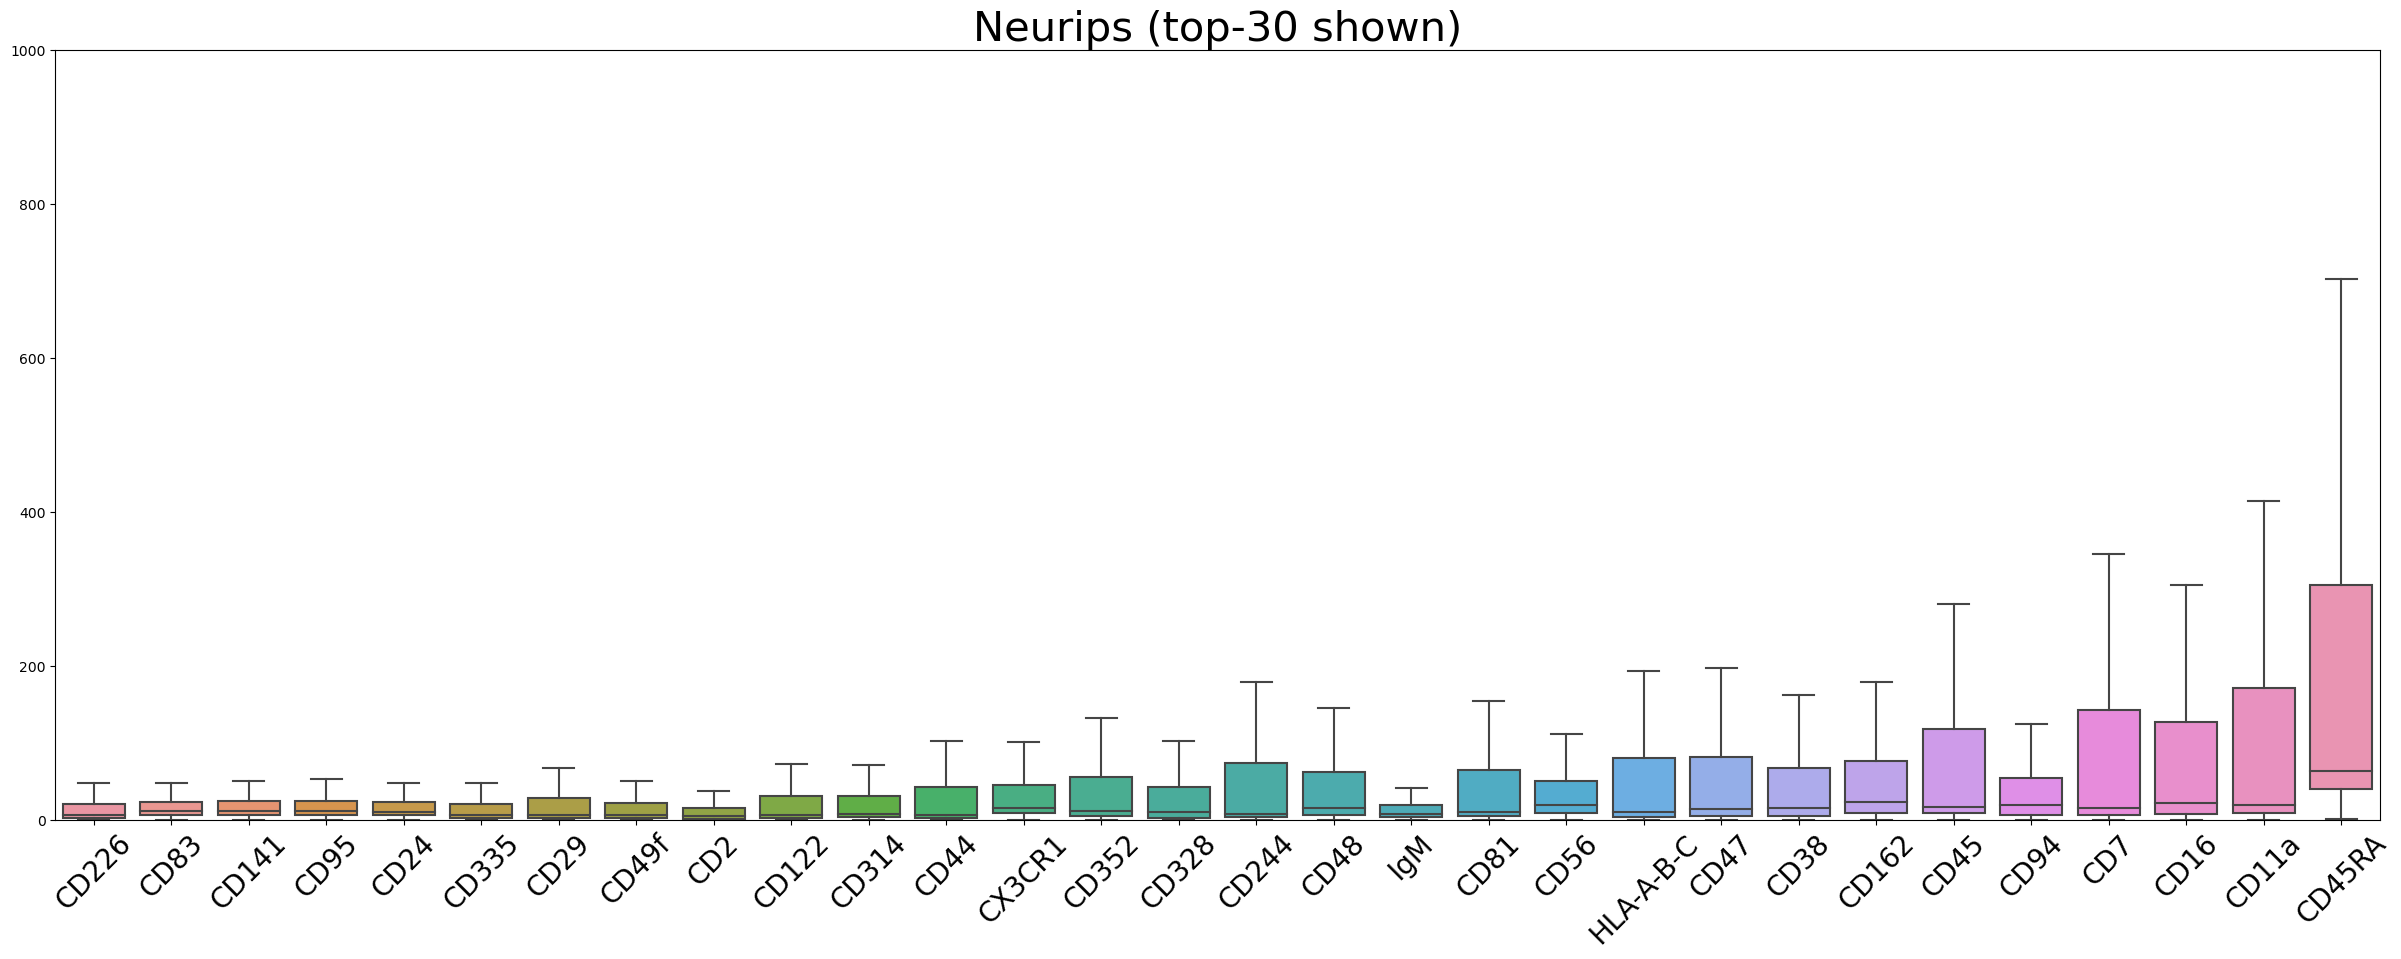

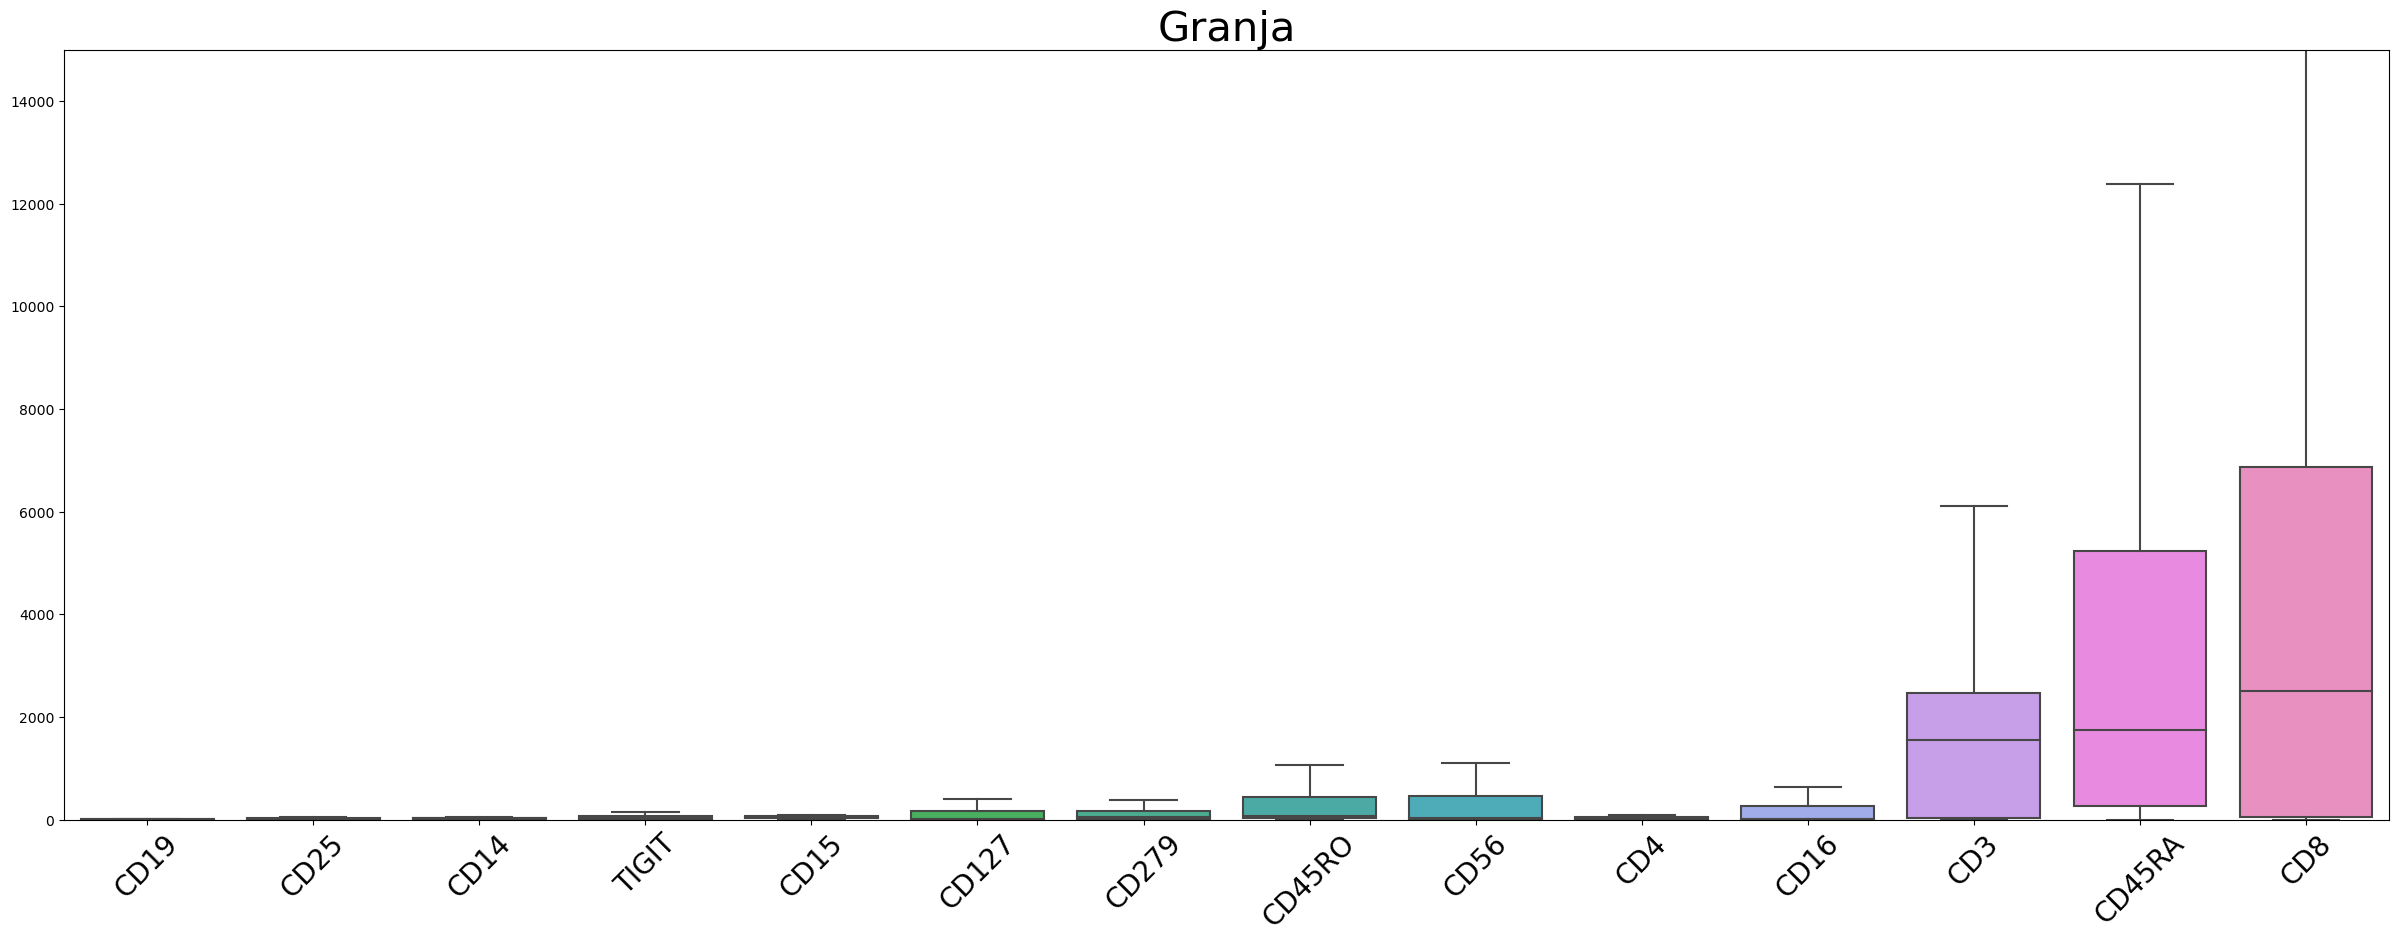

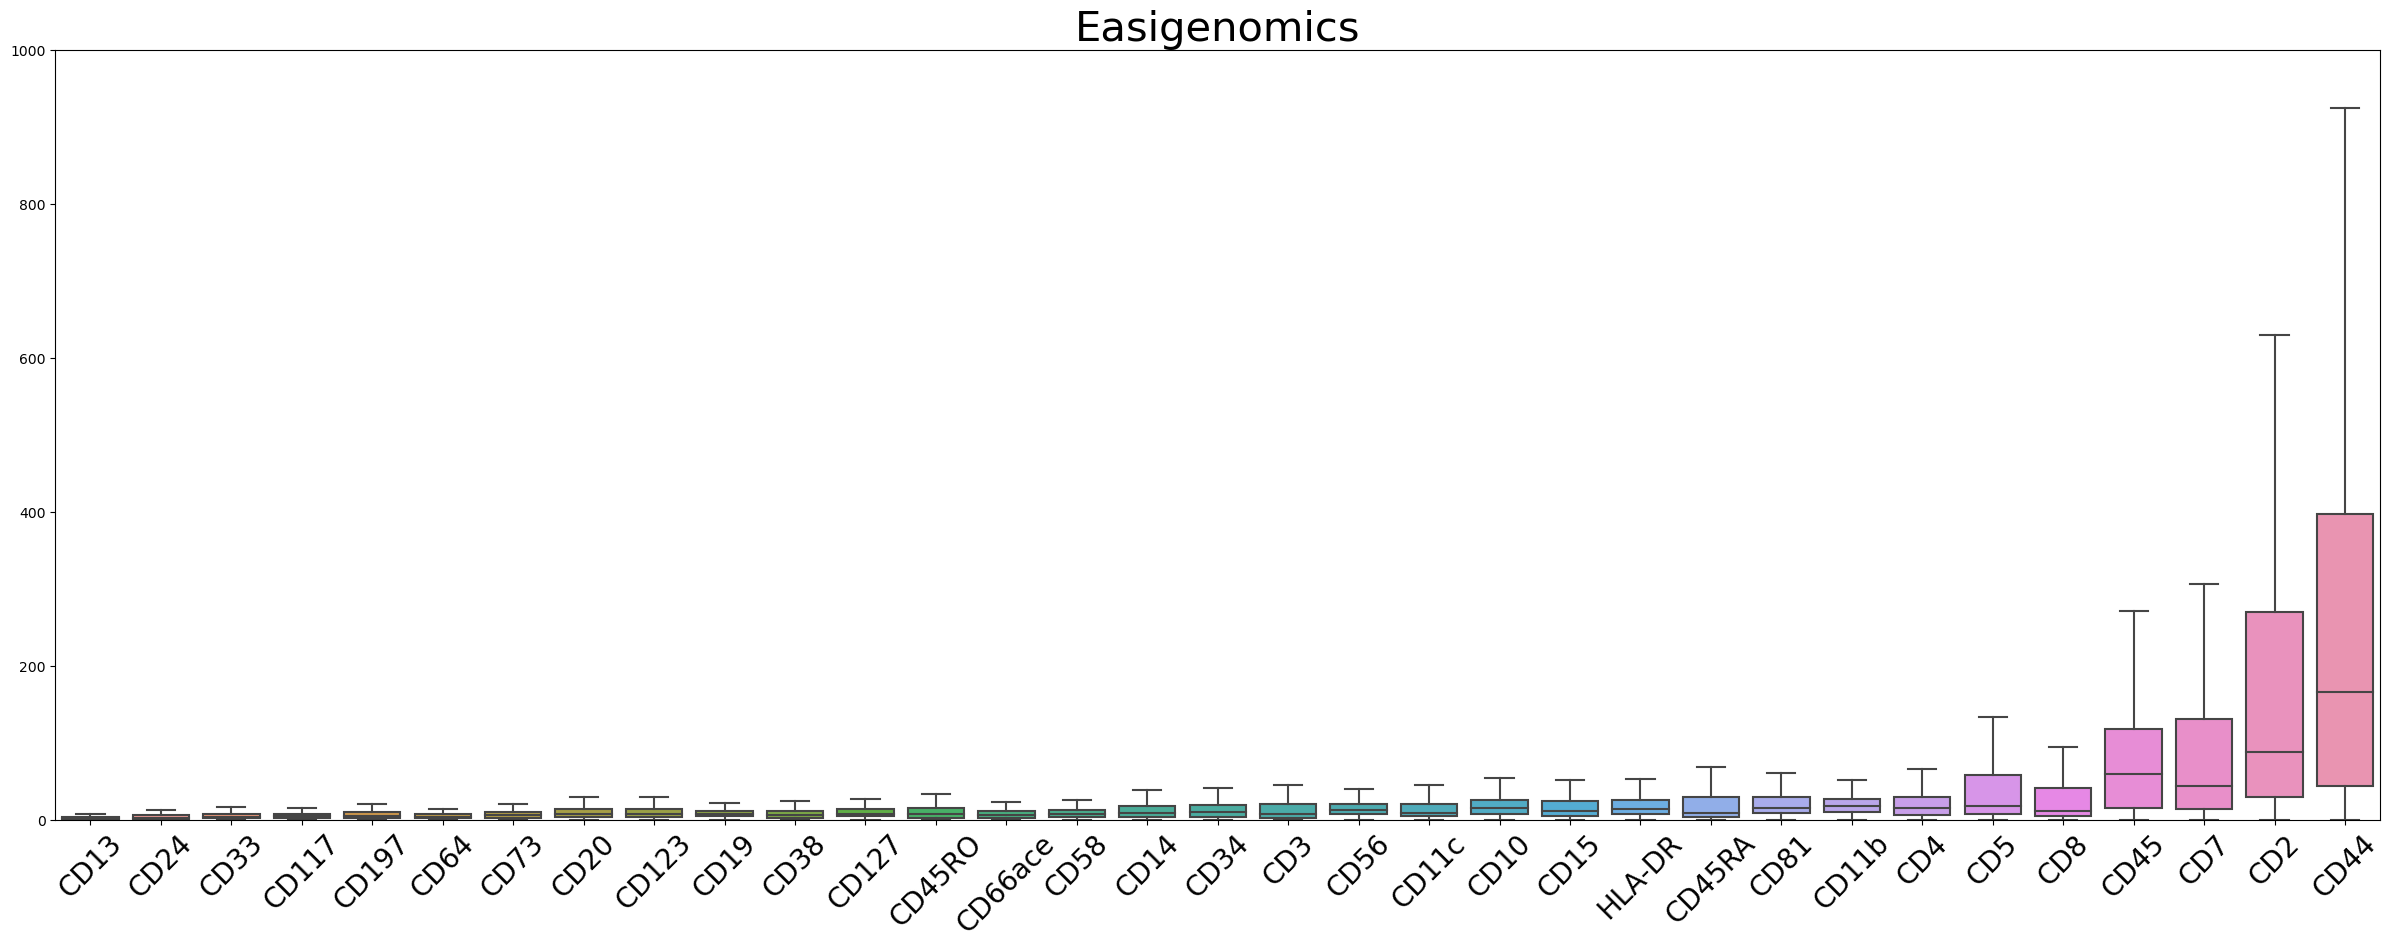

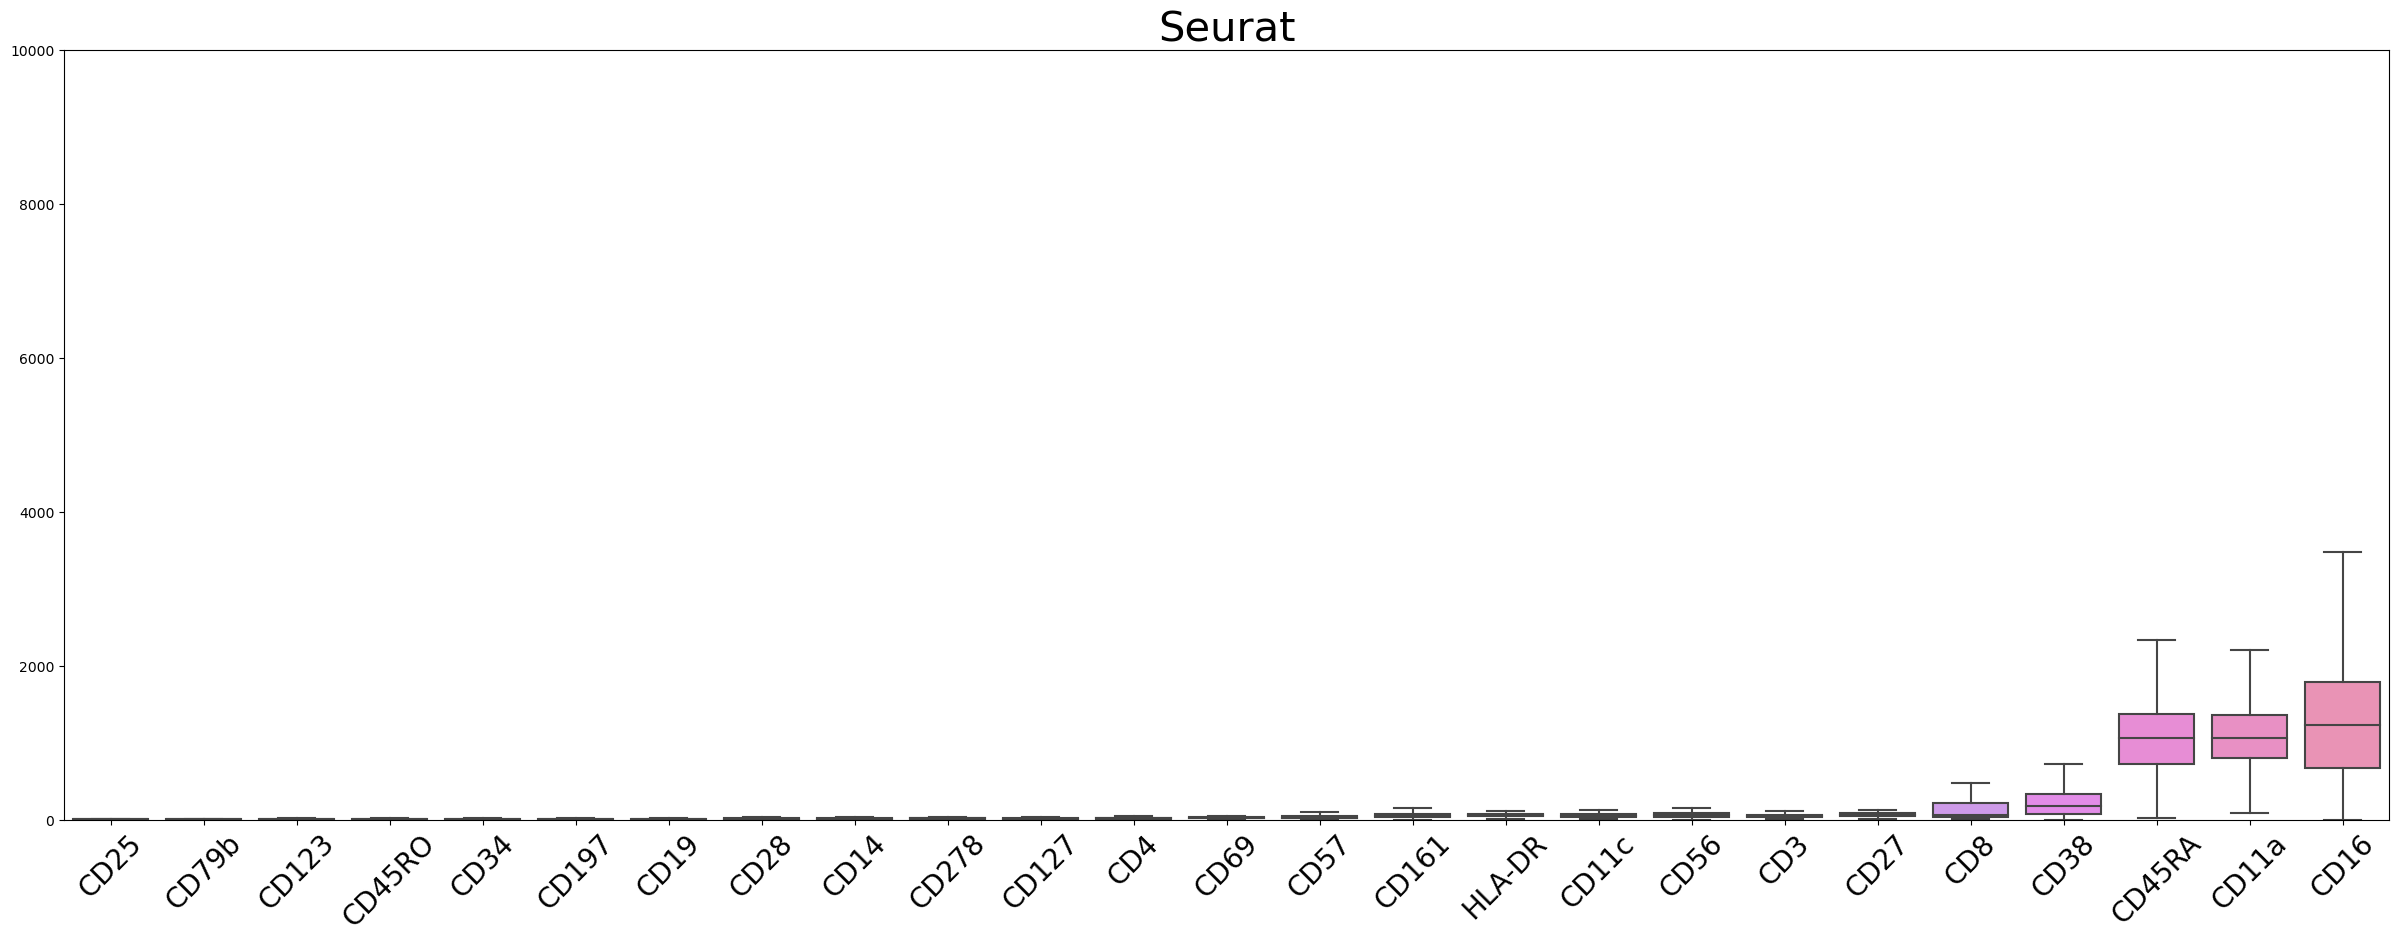

In [48]:
#Neurips top 30
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
a=sns.boxplot(data=df_sorted_neurips.iloc[0:26775,104:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips (top-30 shown)", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
print("In total", len(neurips_nk), "NK-cells in the Neurips dataset")

#Granja
plt.figure(figsize=(30,10))
plt.ylim(0, 15000)
b=sns.boxplot(data=df_sorted_granja,  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)
print("In total", len(granja_nk), "NK-cells in the Granja dataset")

#Easigenomics
plt.figure(figsize=(30,10))
plt.ylim(0, 1000)
c=sns.boxplot(data=df_sorted_easi,  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)
print("In total", len(easi_nkt), "NK- and T-cells in the Easigenomics dataset")

#Seurat
plt.figure(figsize=(30,10))
plt.ylim(0, 10000)
d=sns.boxplot(data=df_sorted_seurat,  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;
print("In total", len(seurat_nk), "NK-cells in the Seurat dataset")

In total 7388 NK-cells in the Neurips dataset
In total 1033 NK-cells in the Granja dataset
In total 27738 NK- and T-cells in the Easigenomics dataset
In total 1355 NK-cells in the Seurat dataset


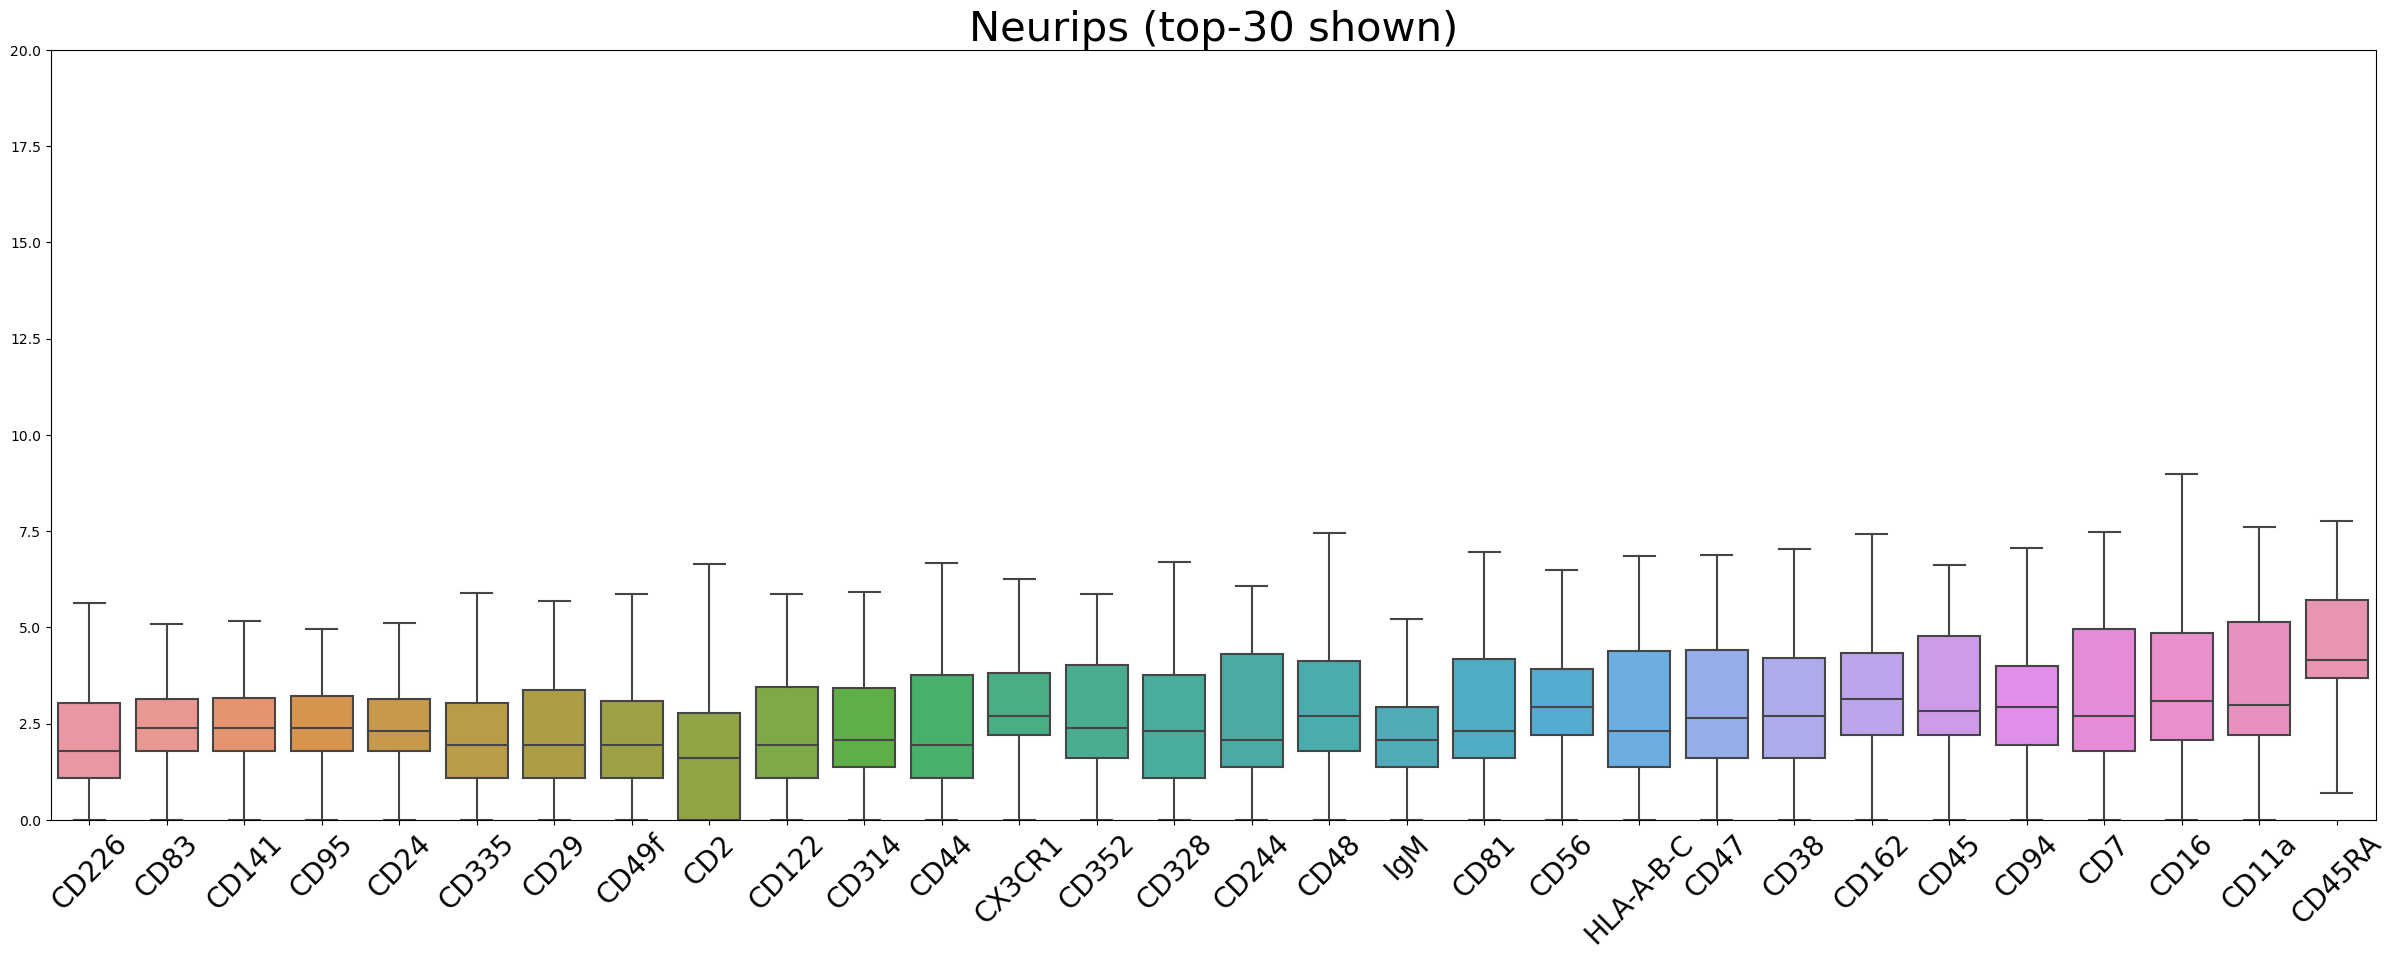

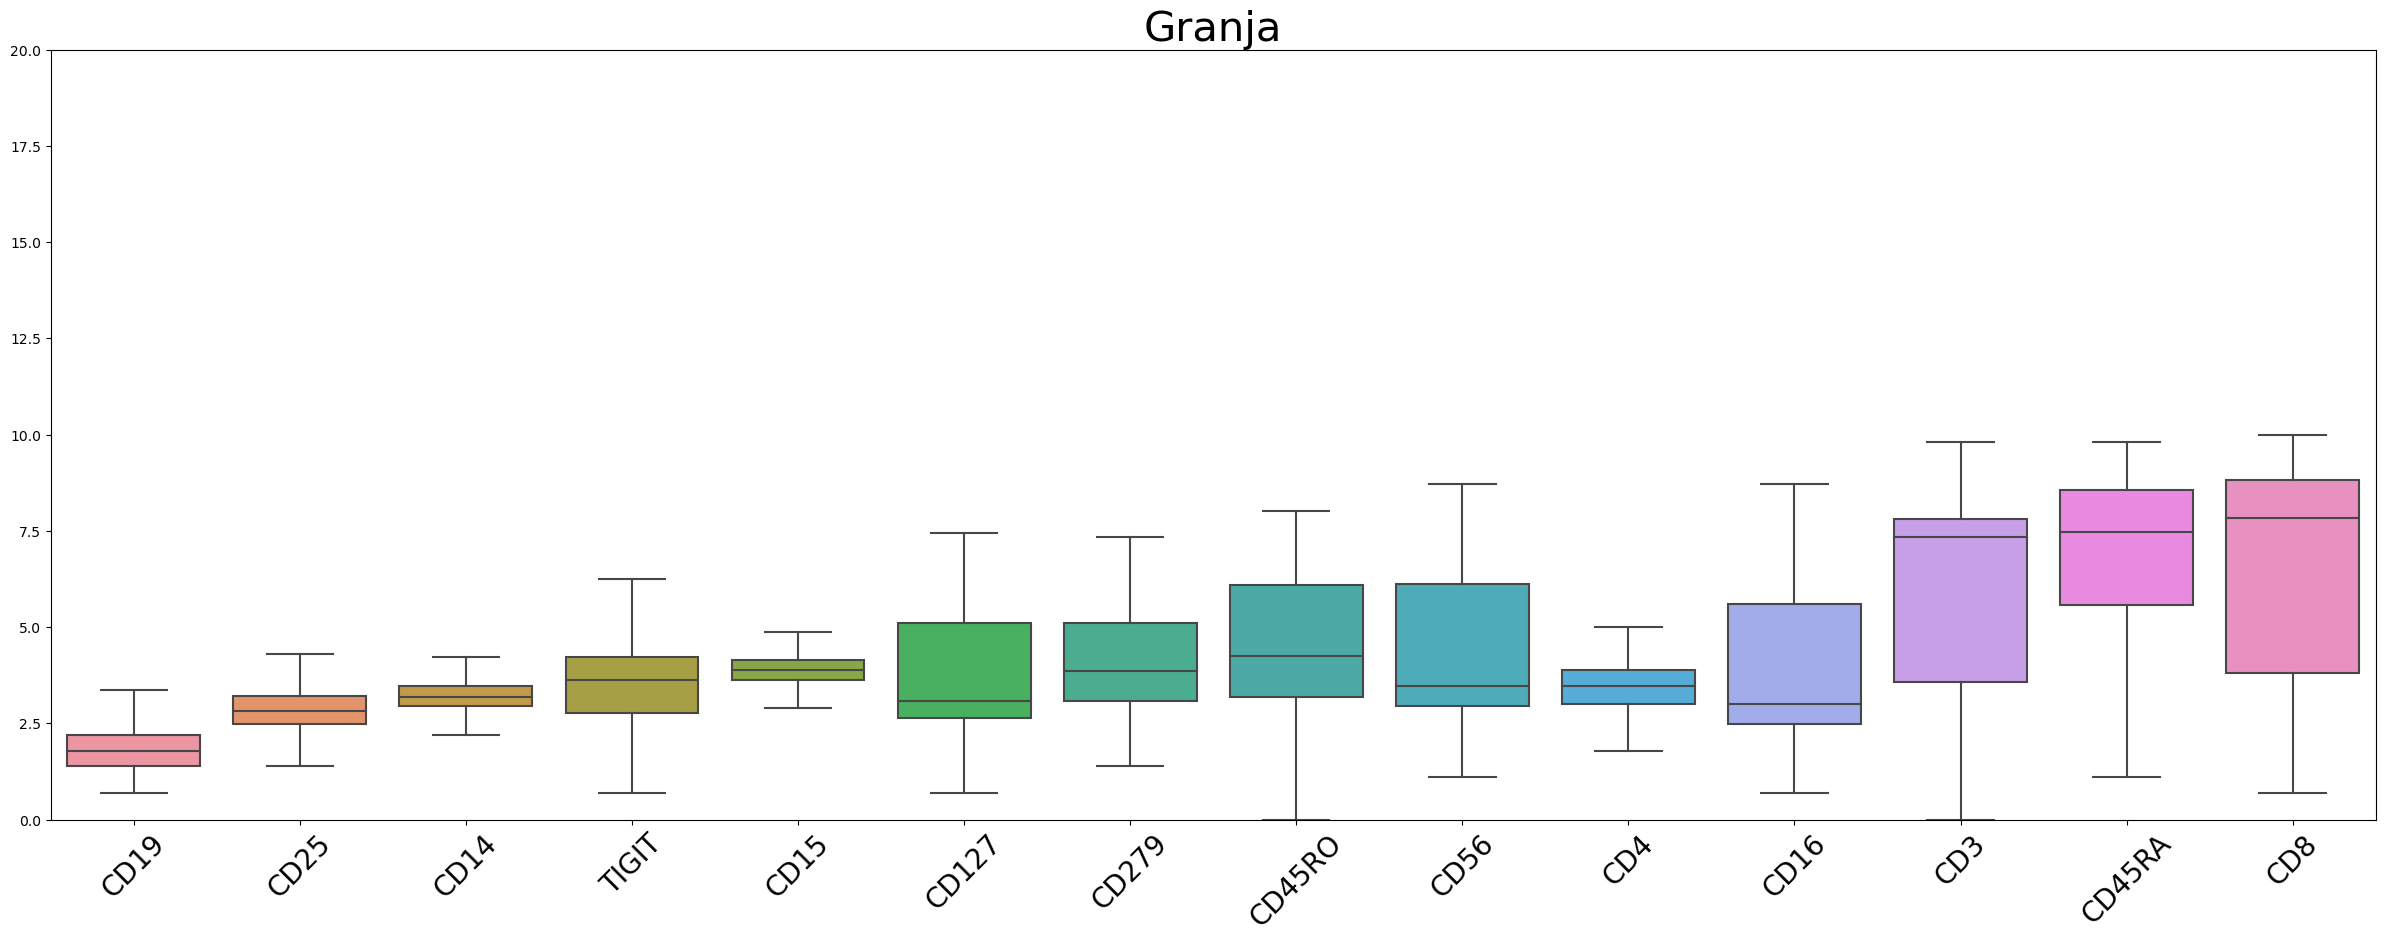

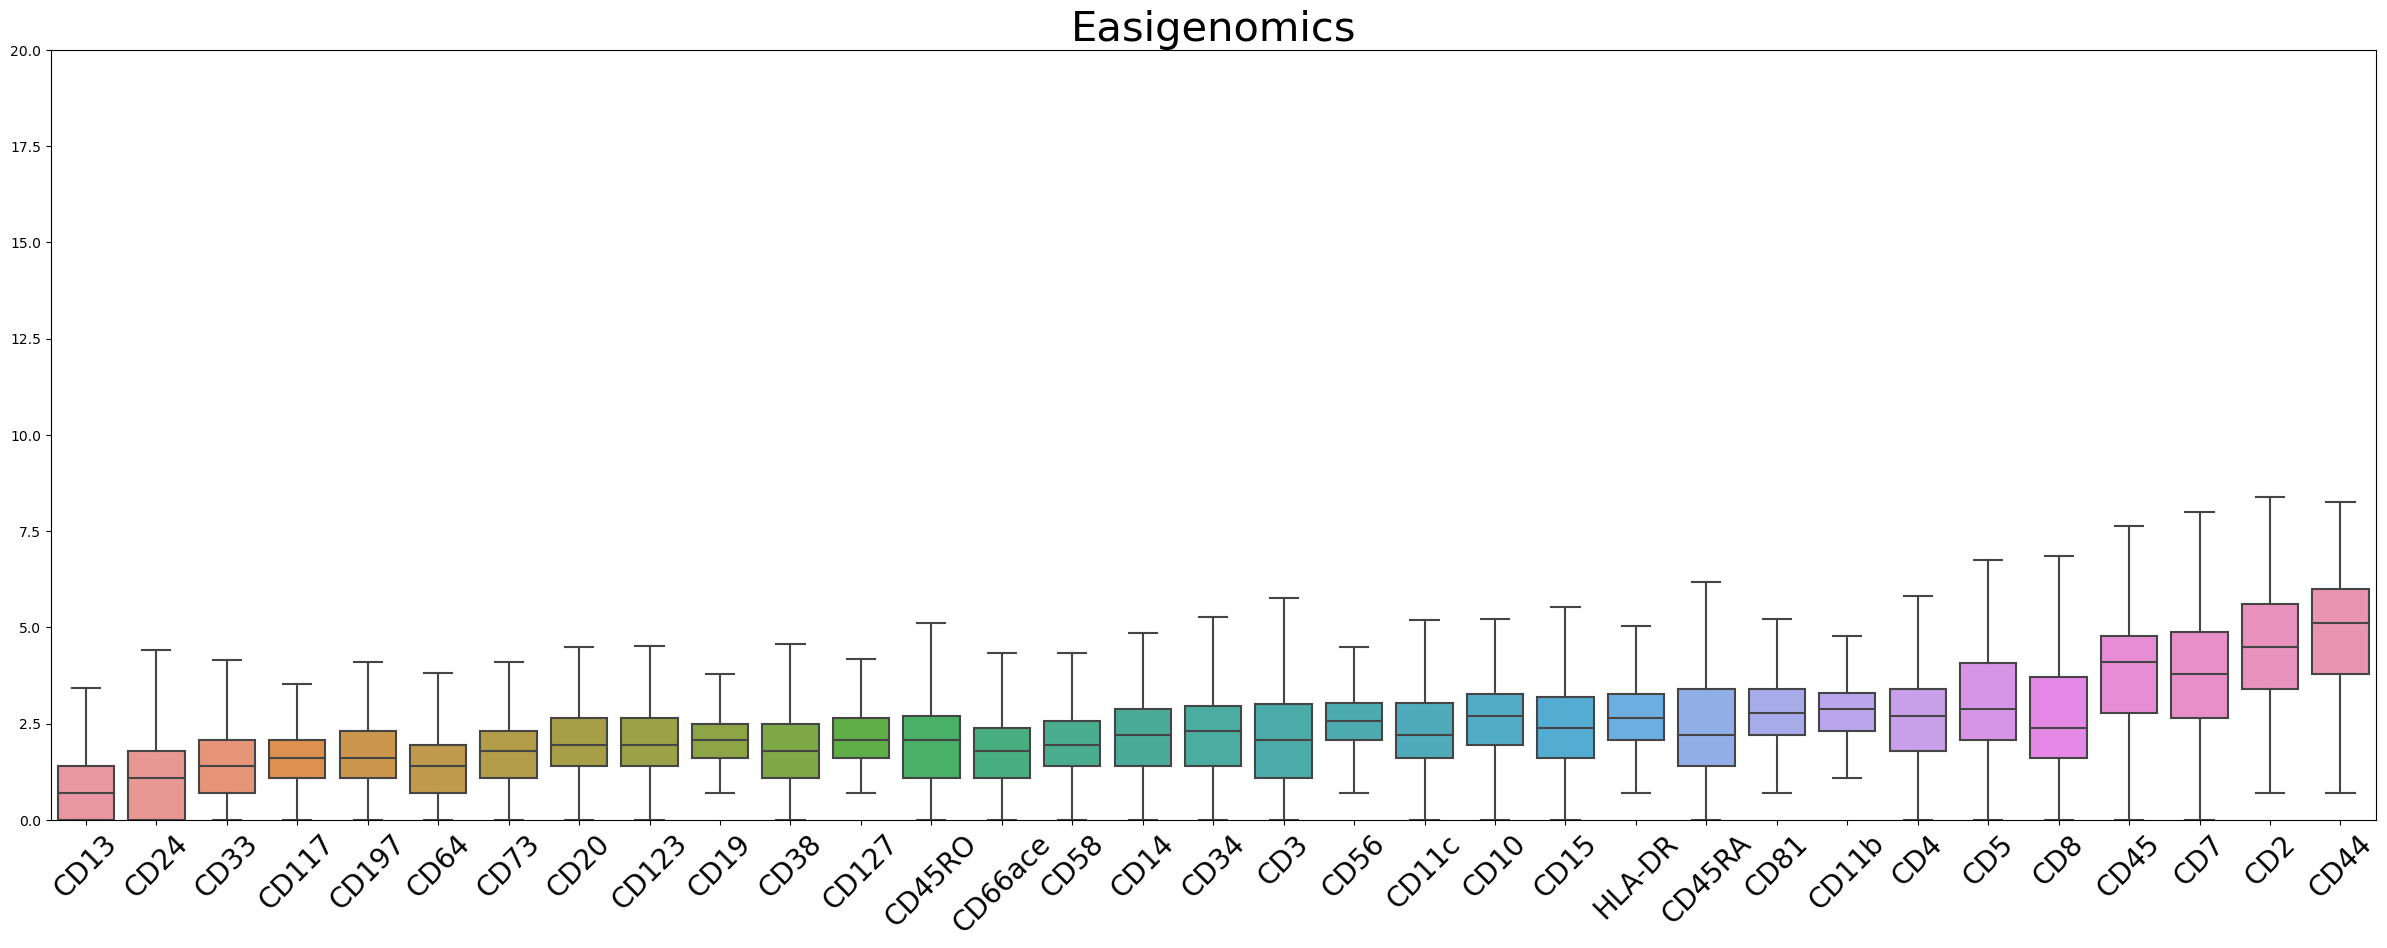

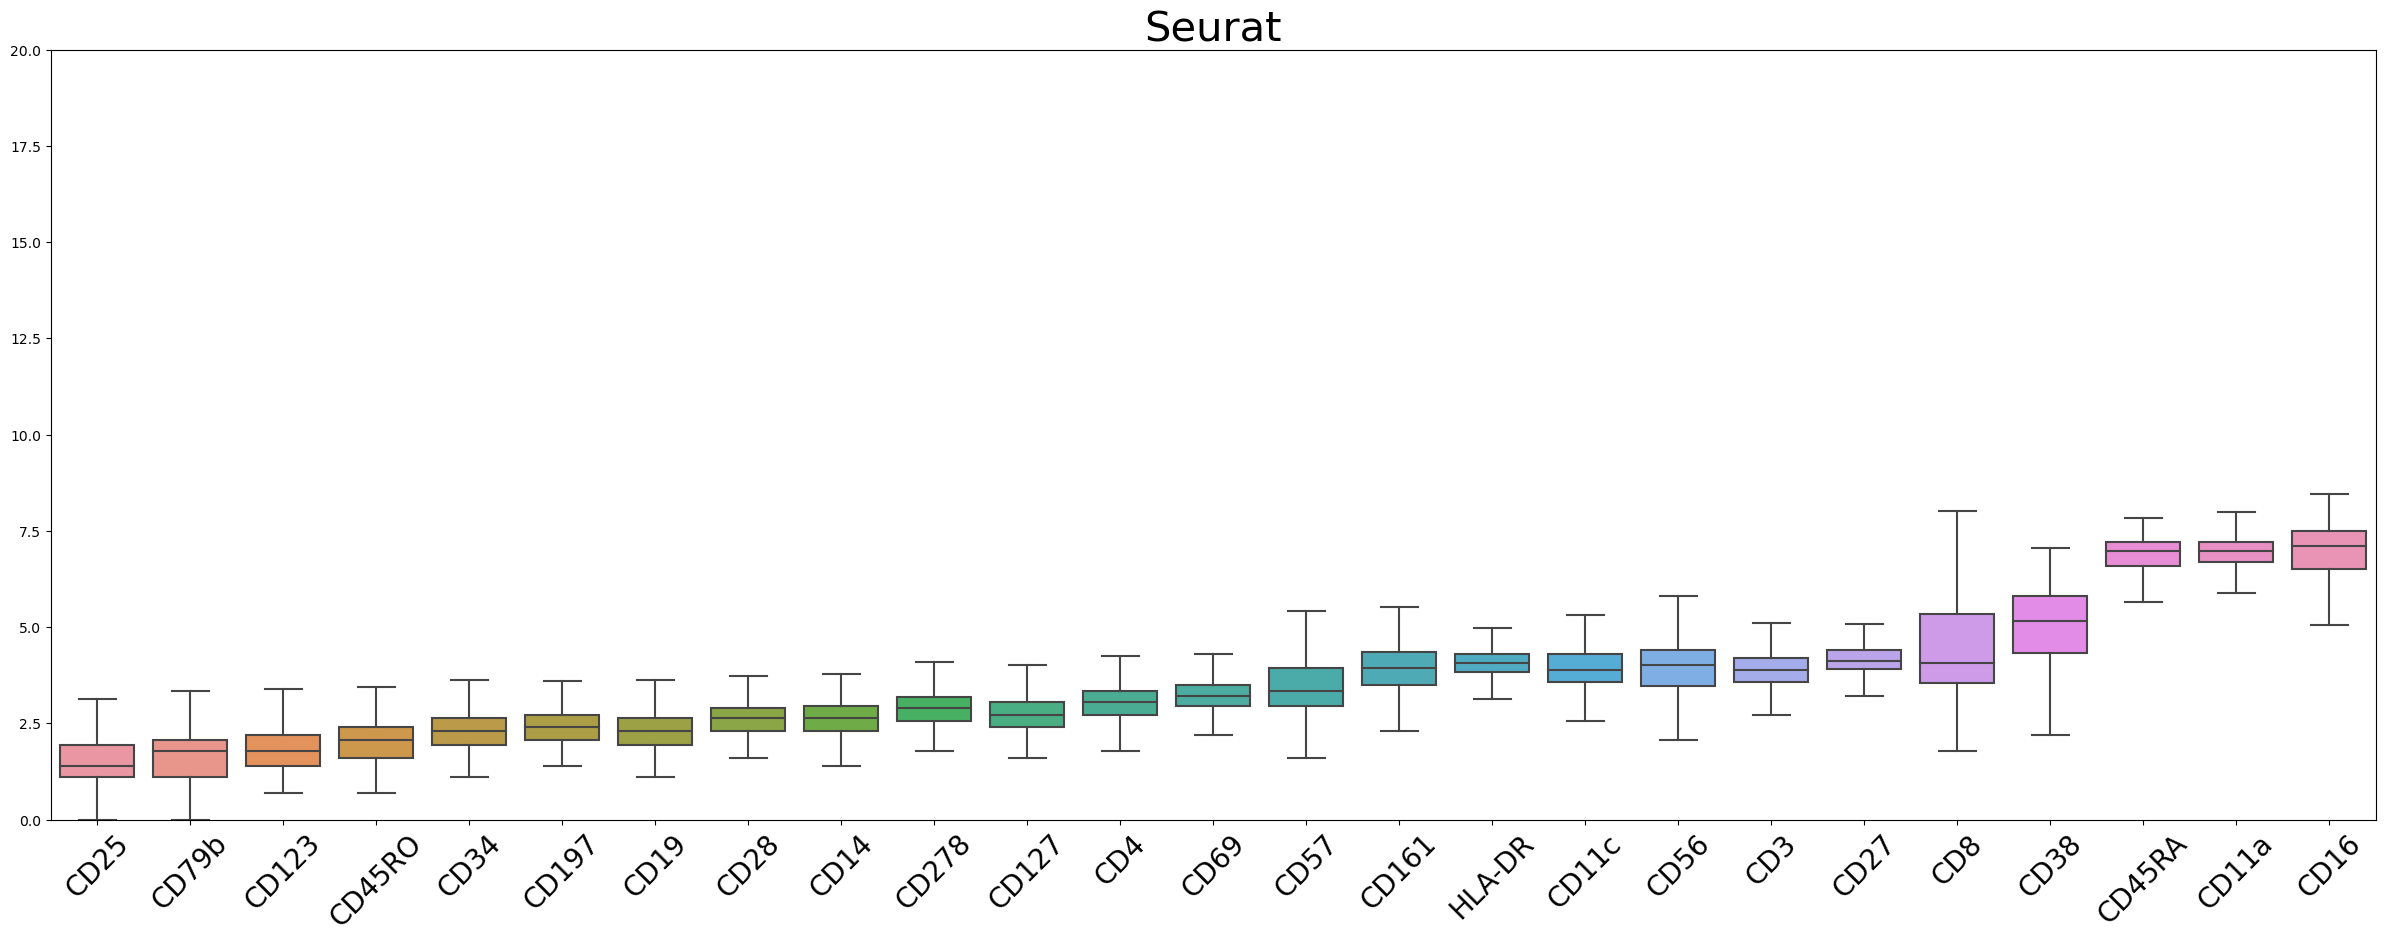

In [49]:
#Log-normalized counts

#Neurips top 30
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
a=sns.boxplot(data=np.log(df_sorted_neurips.iloc[0:26775,104:134]),  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips (top-30 shown)", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
print("In total", len(neurips_nk), "NK-cells in the Neurips dataset")

#Granja
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
b=sns.boxplot(data=np.log(df_sorted_granja),  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)
print("In total", len(granja_nk), "NK-cells in the Granja dataset")

#Easigenomics
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
c=sns.boxplot(data=np.log(df_sorted_easi),  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)
print("In total", len(easi_nkt), "NK- and T-cells in the Easigenomics dataset")

#Seurat
plt.figure(figsize=(30,10))
plt.ylim(0, 20)
d=sns.boxplot(data=np.log(df_sorted_seurat),  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;
print("In total", len(seurat_nk), "NK-cells in the Seurat dataset")

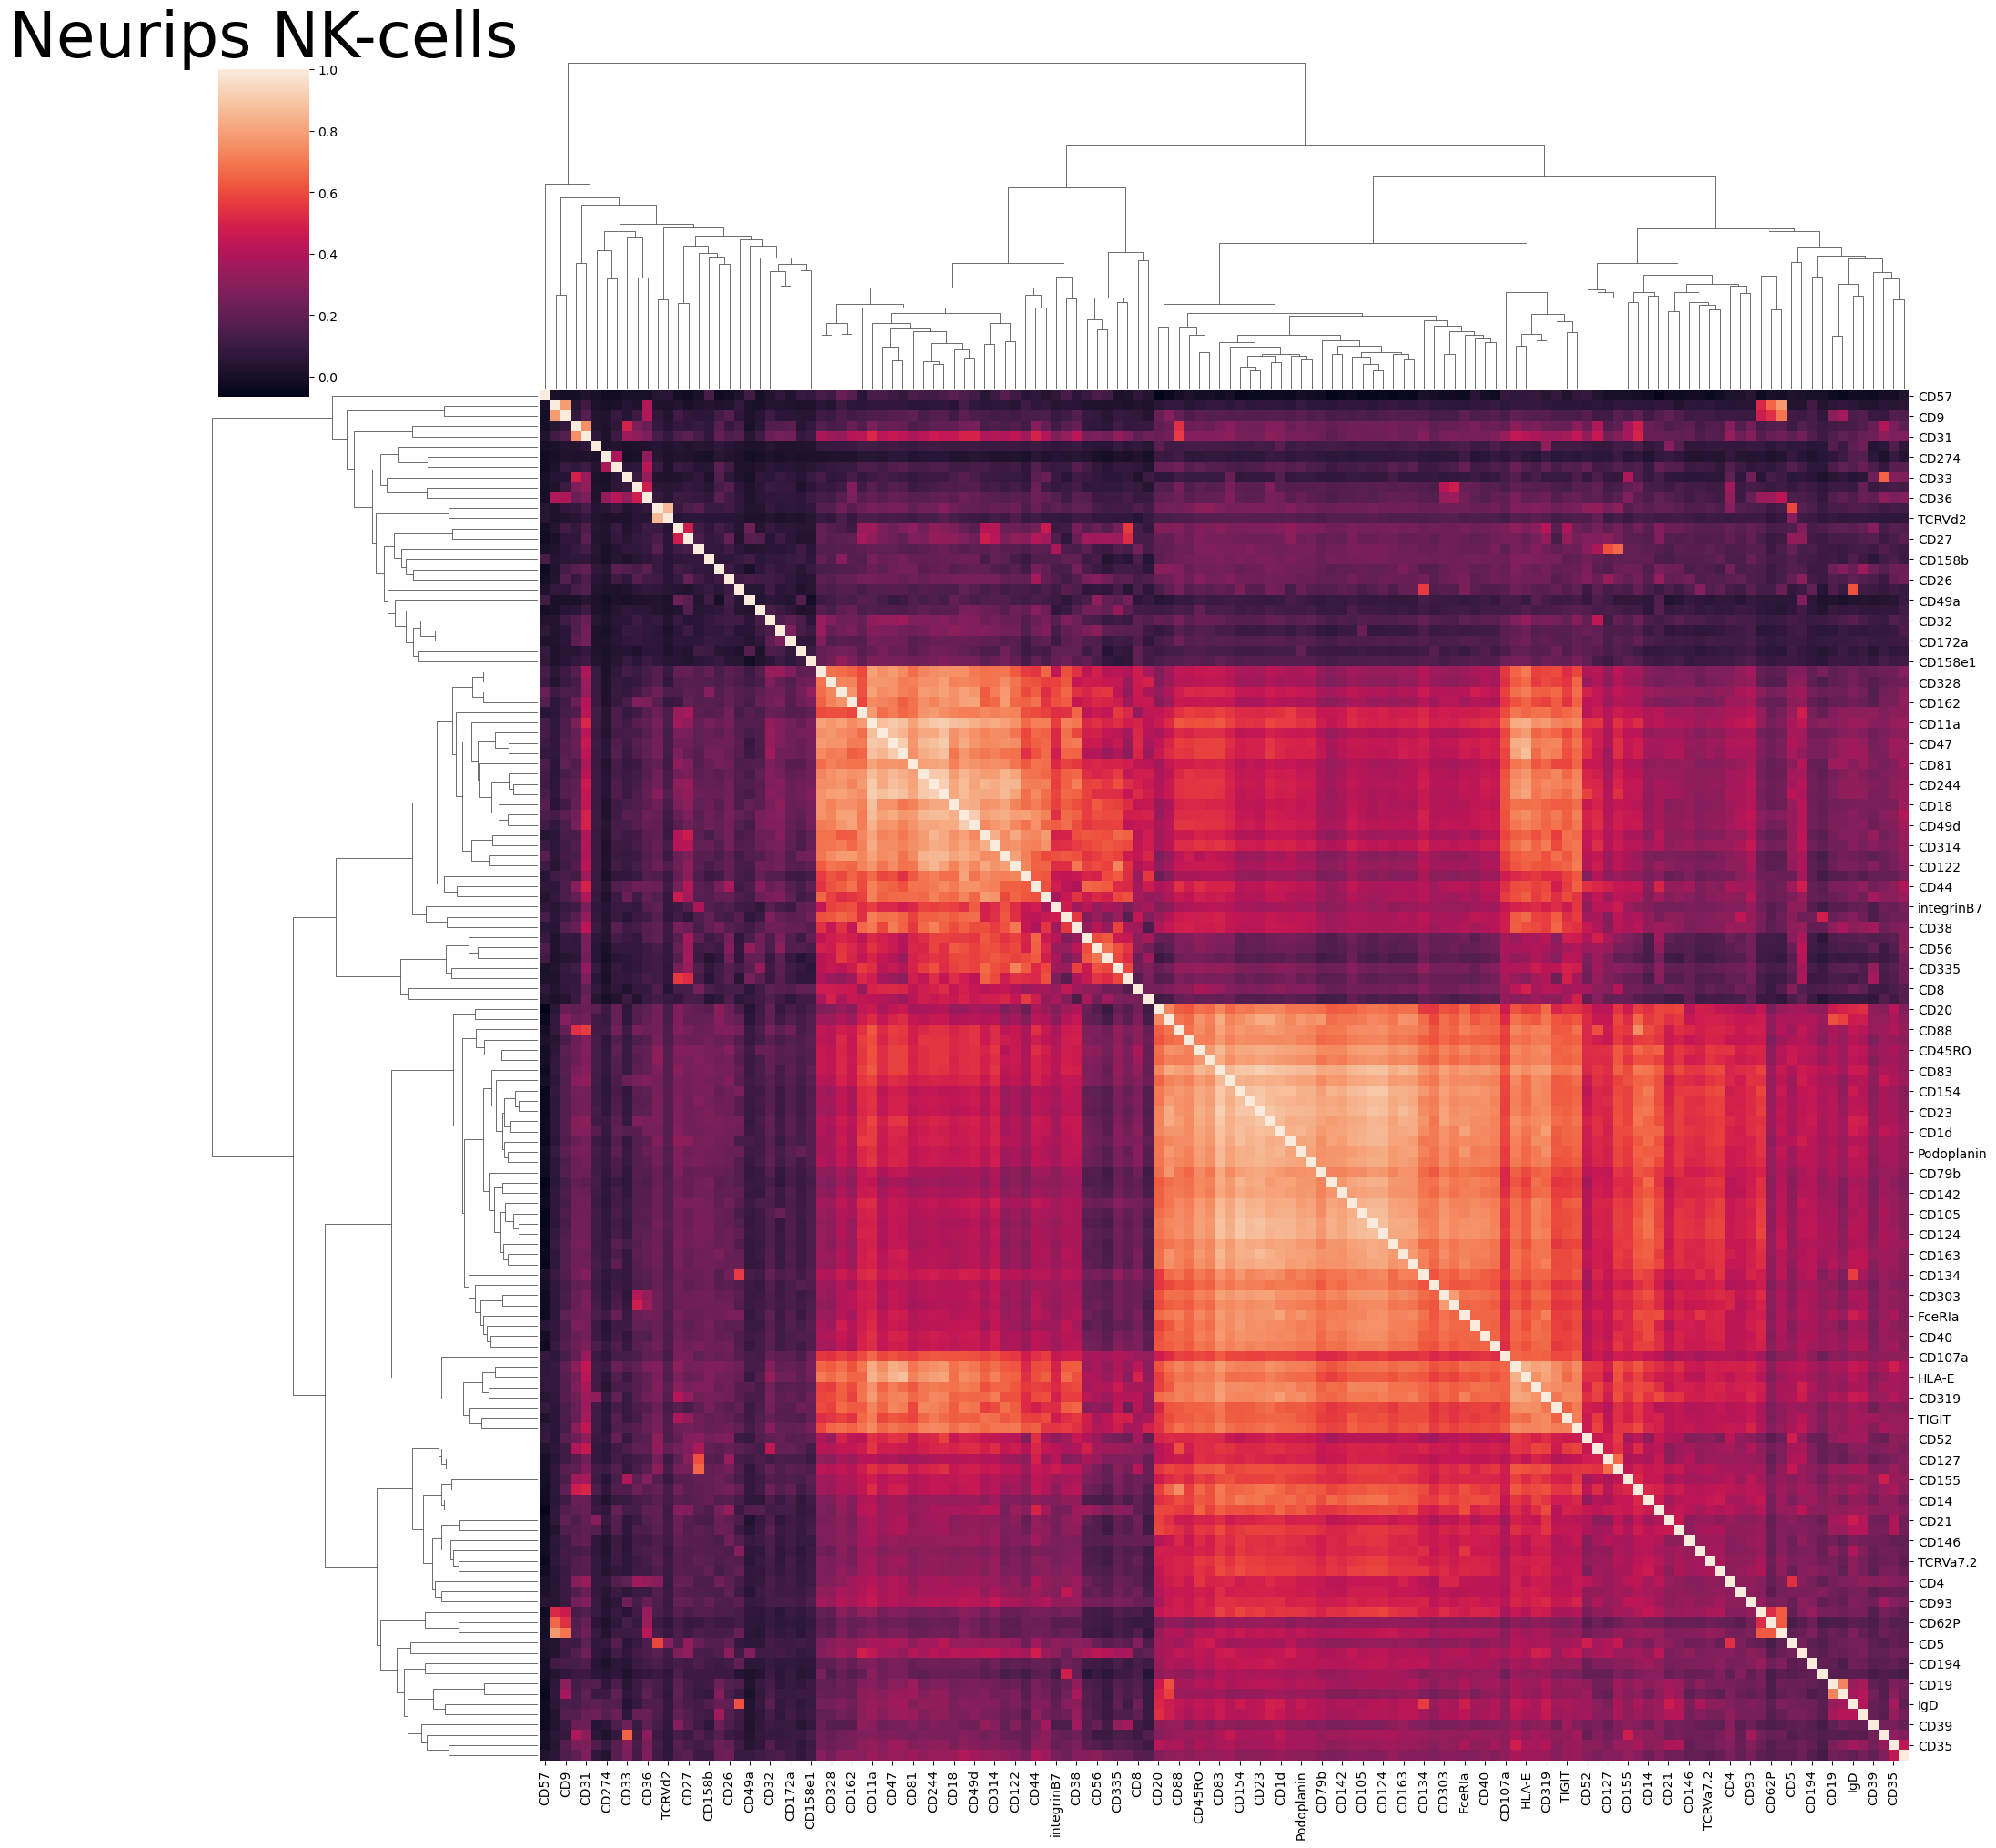

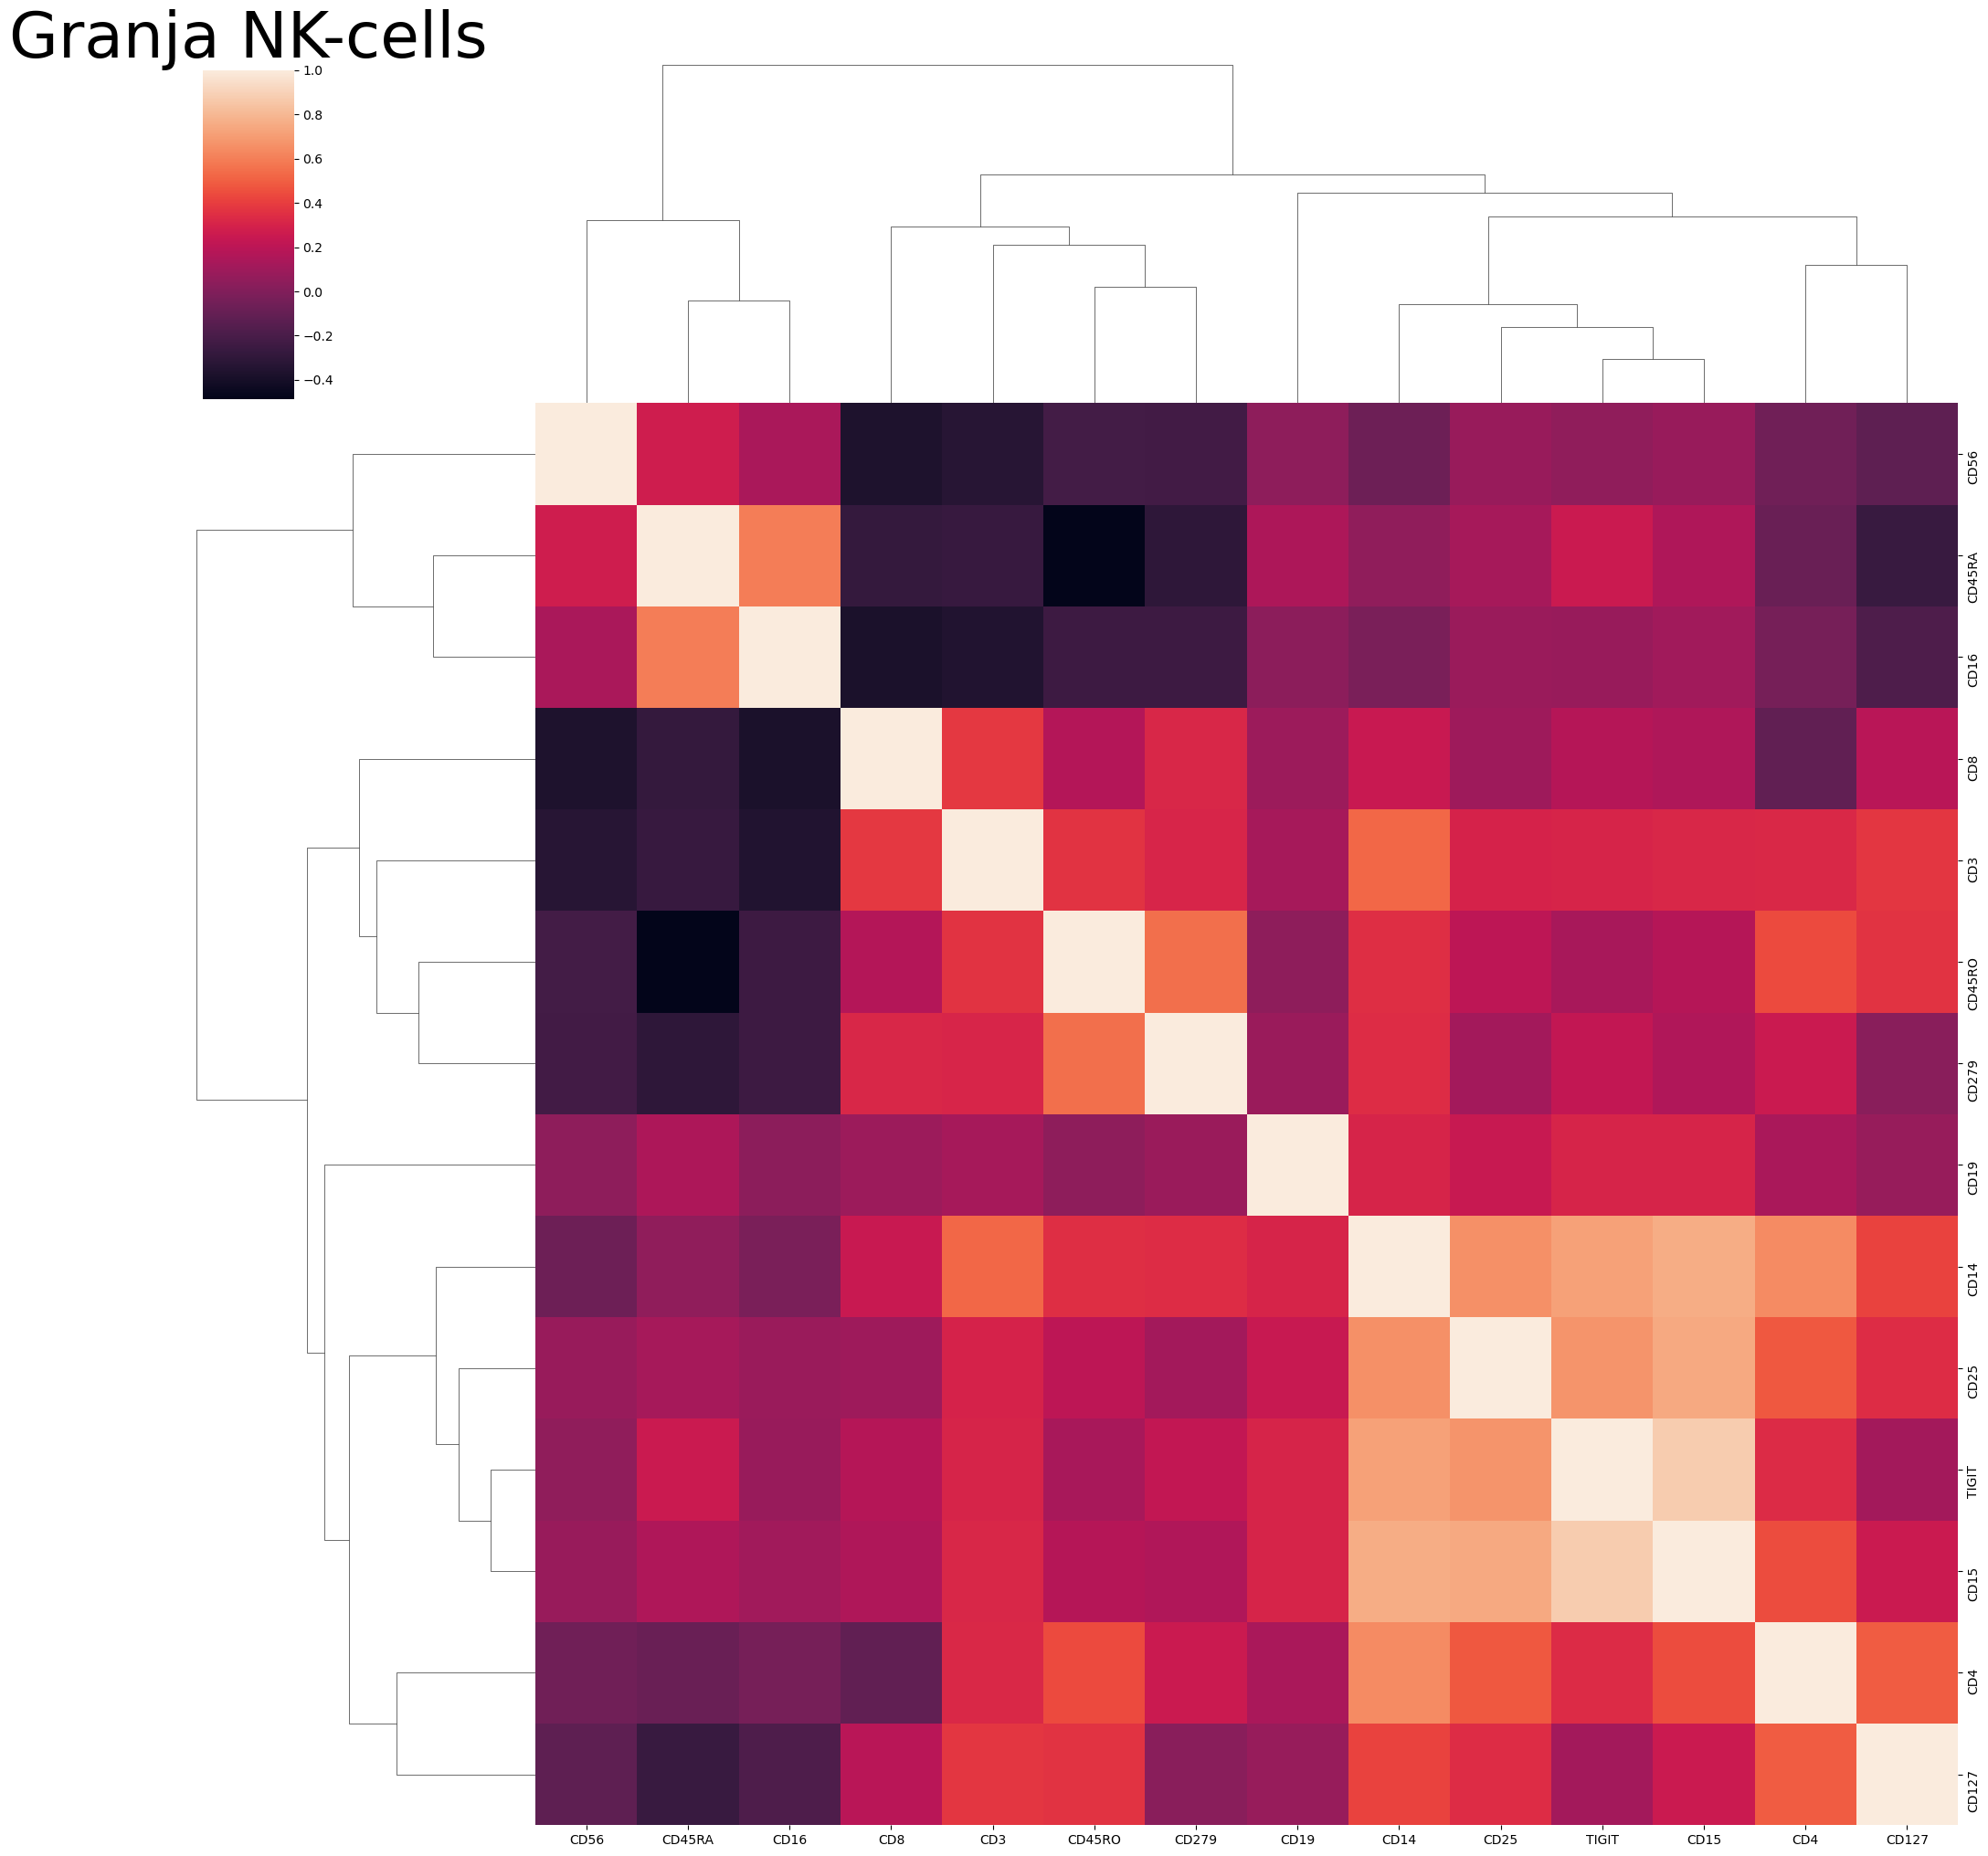

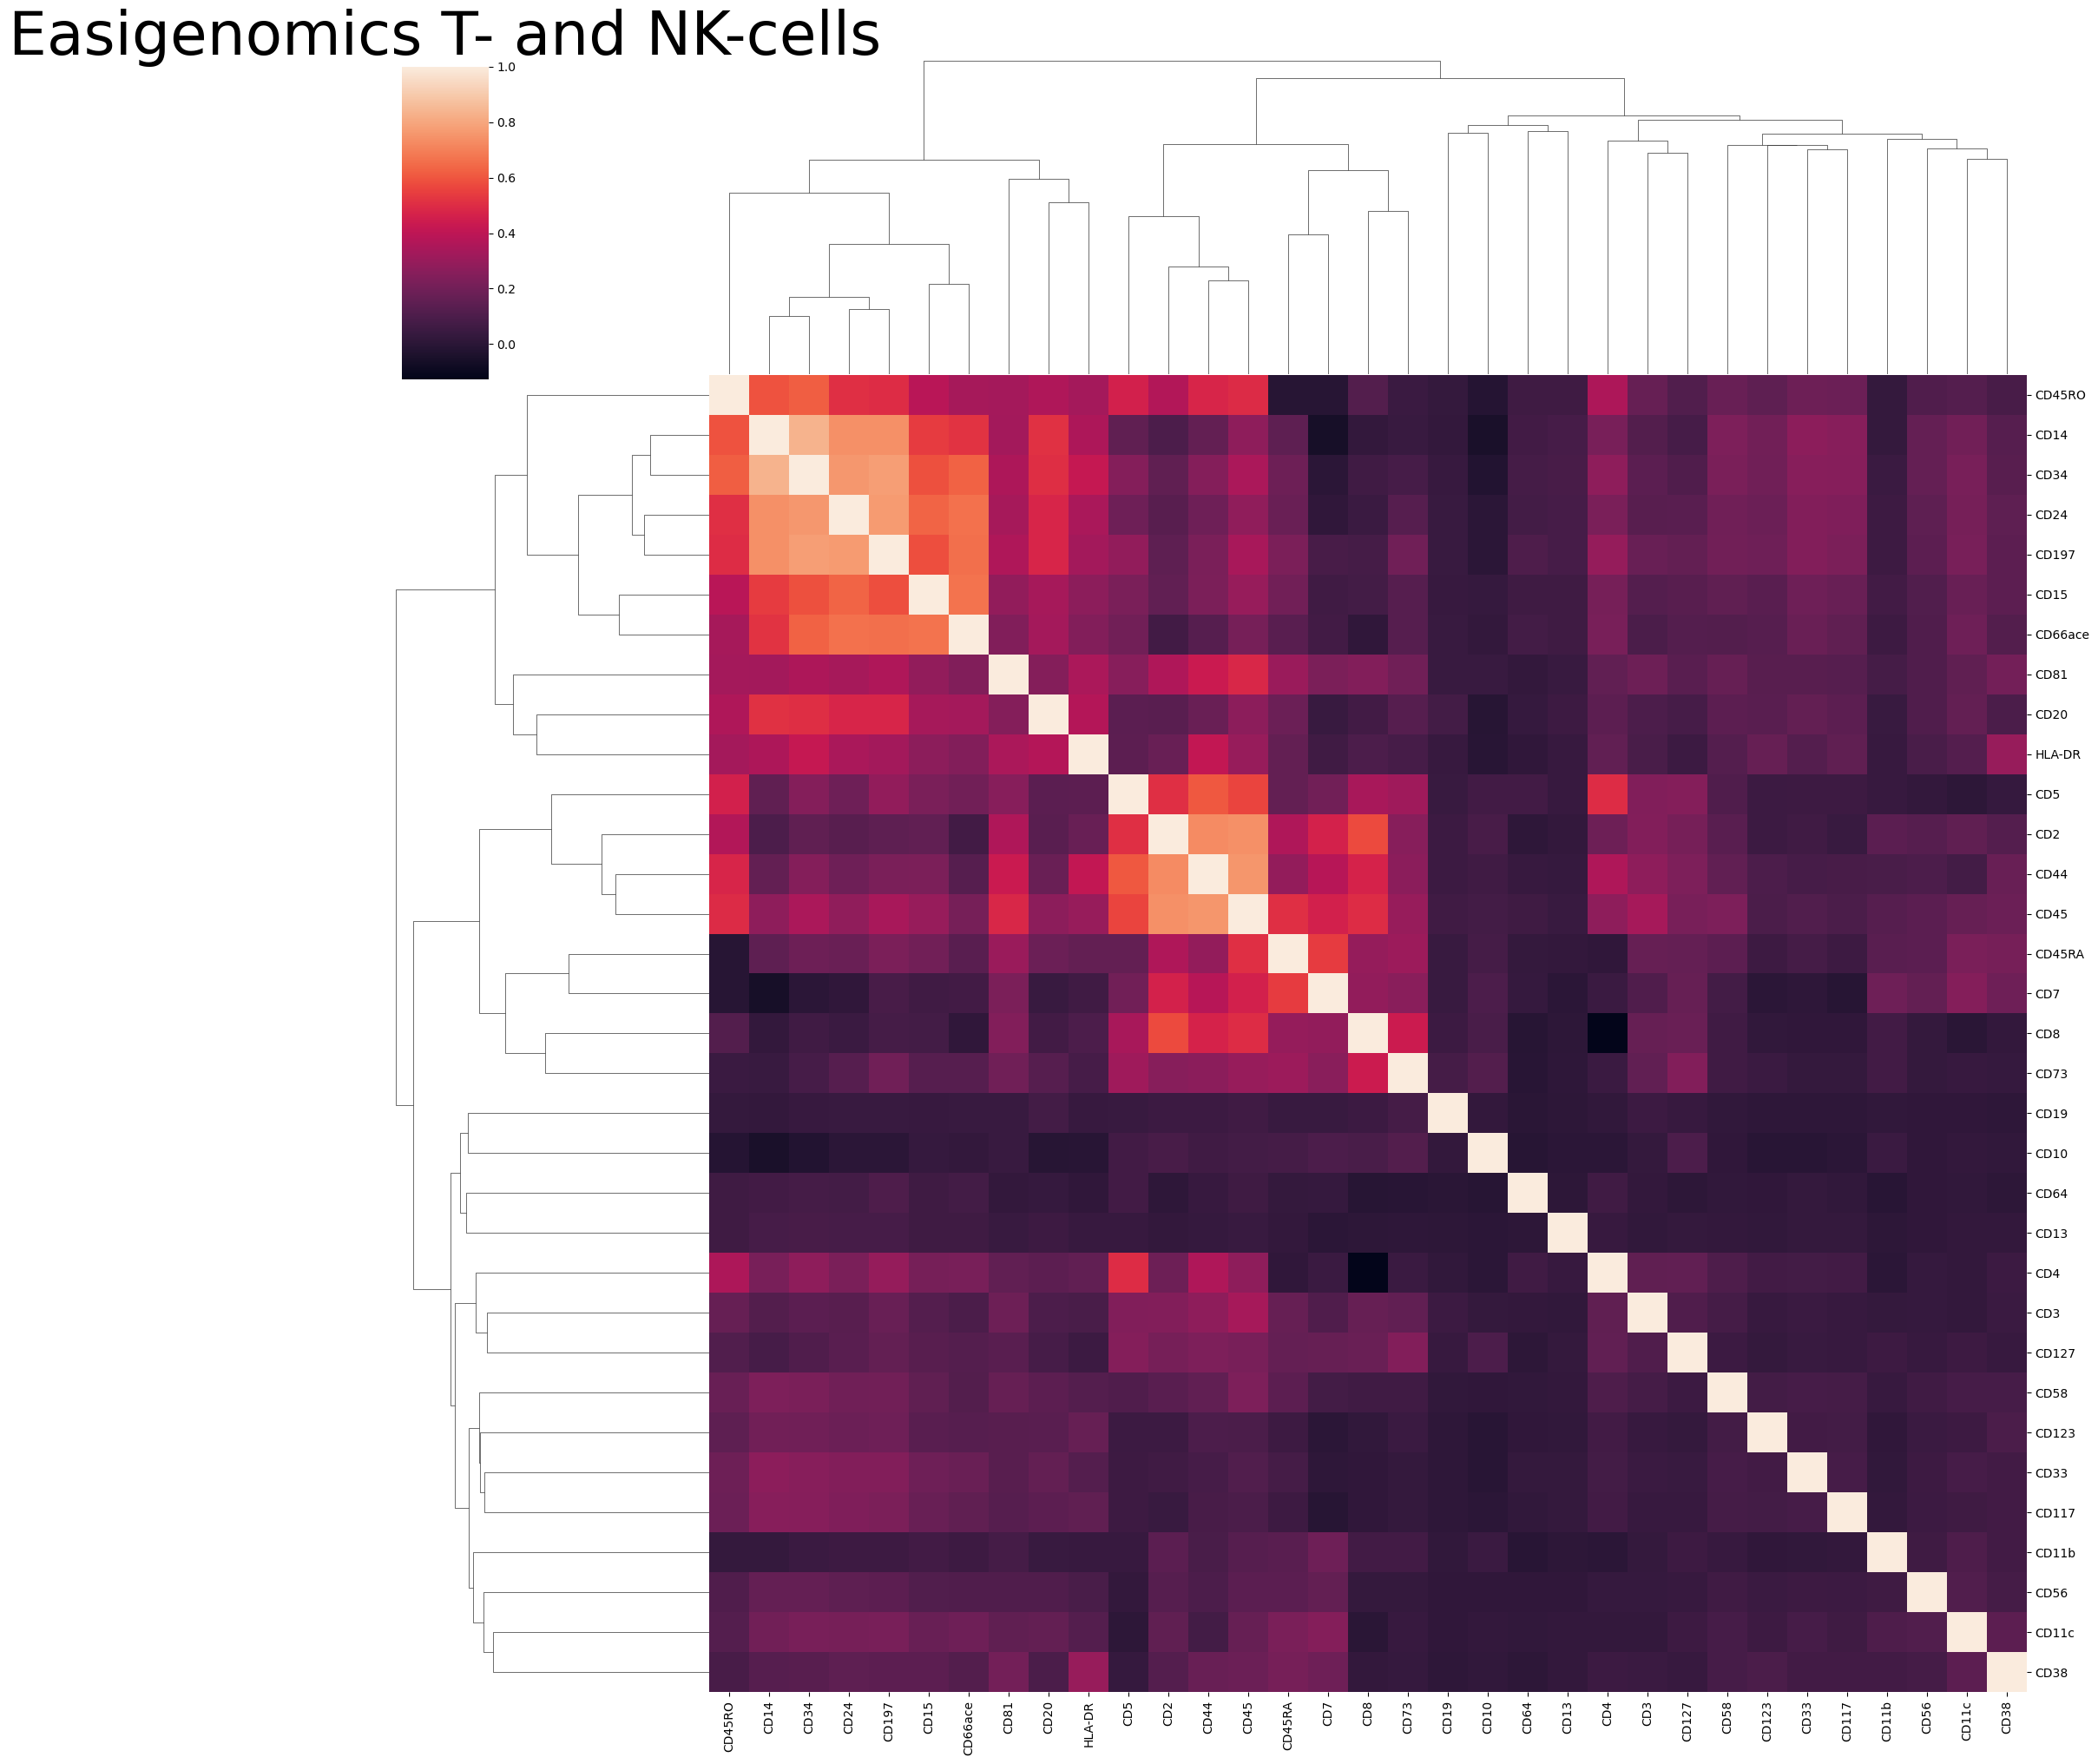

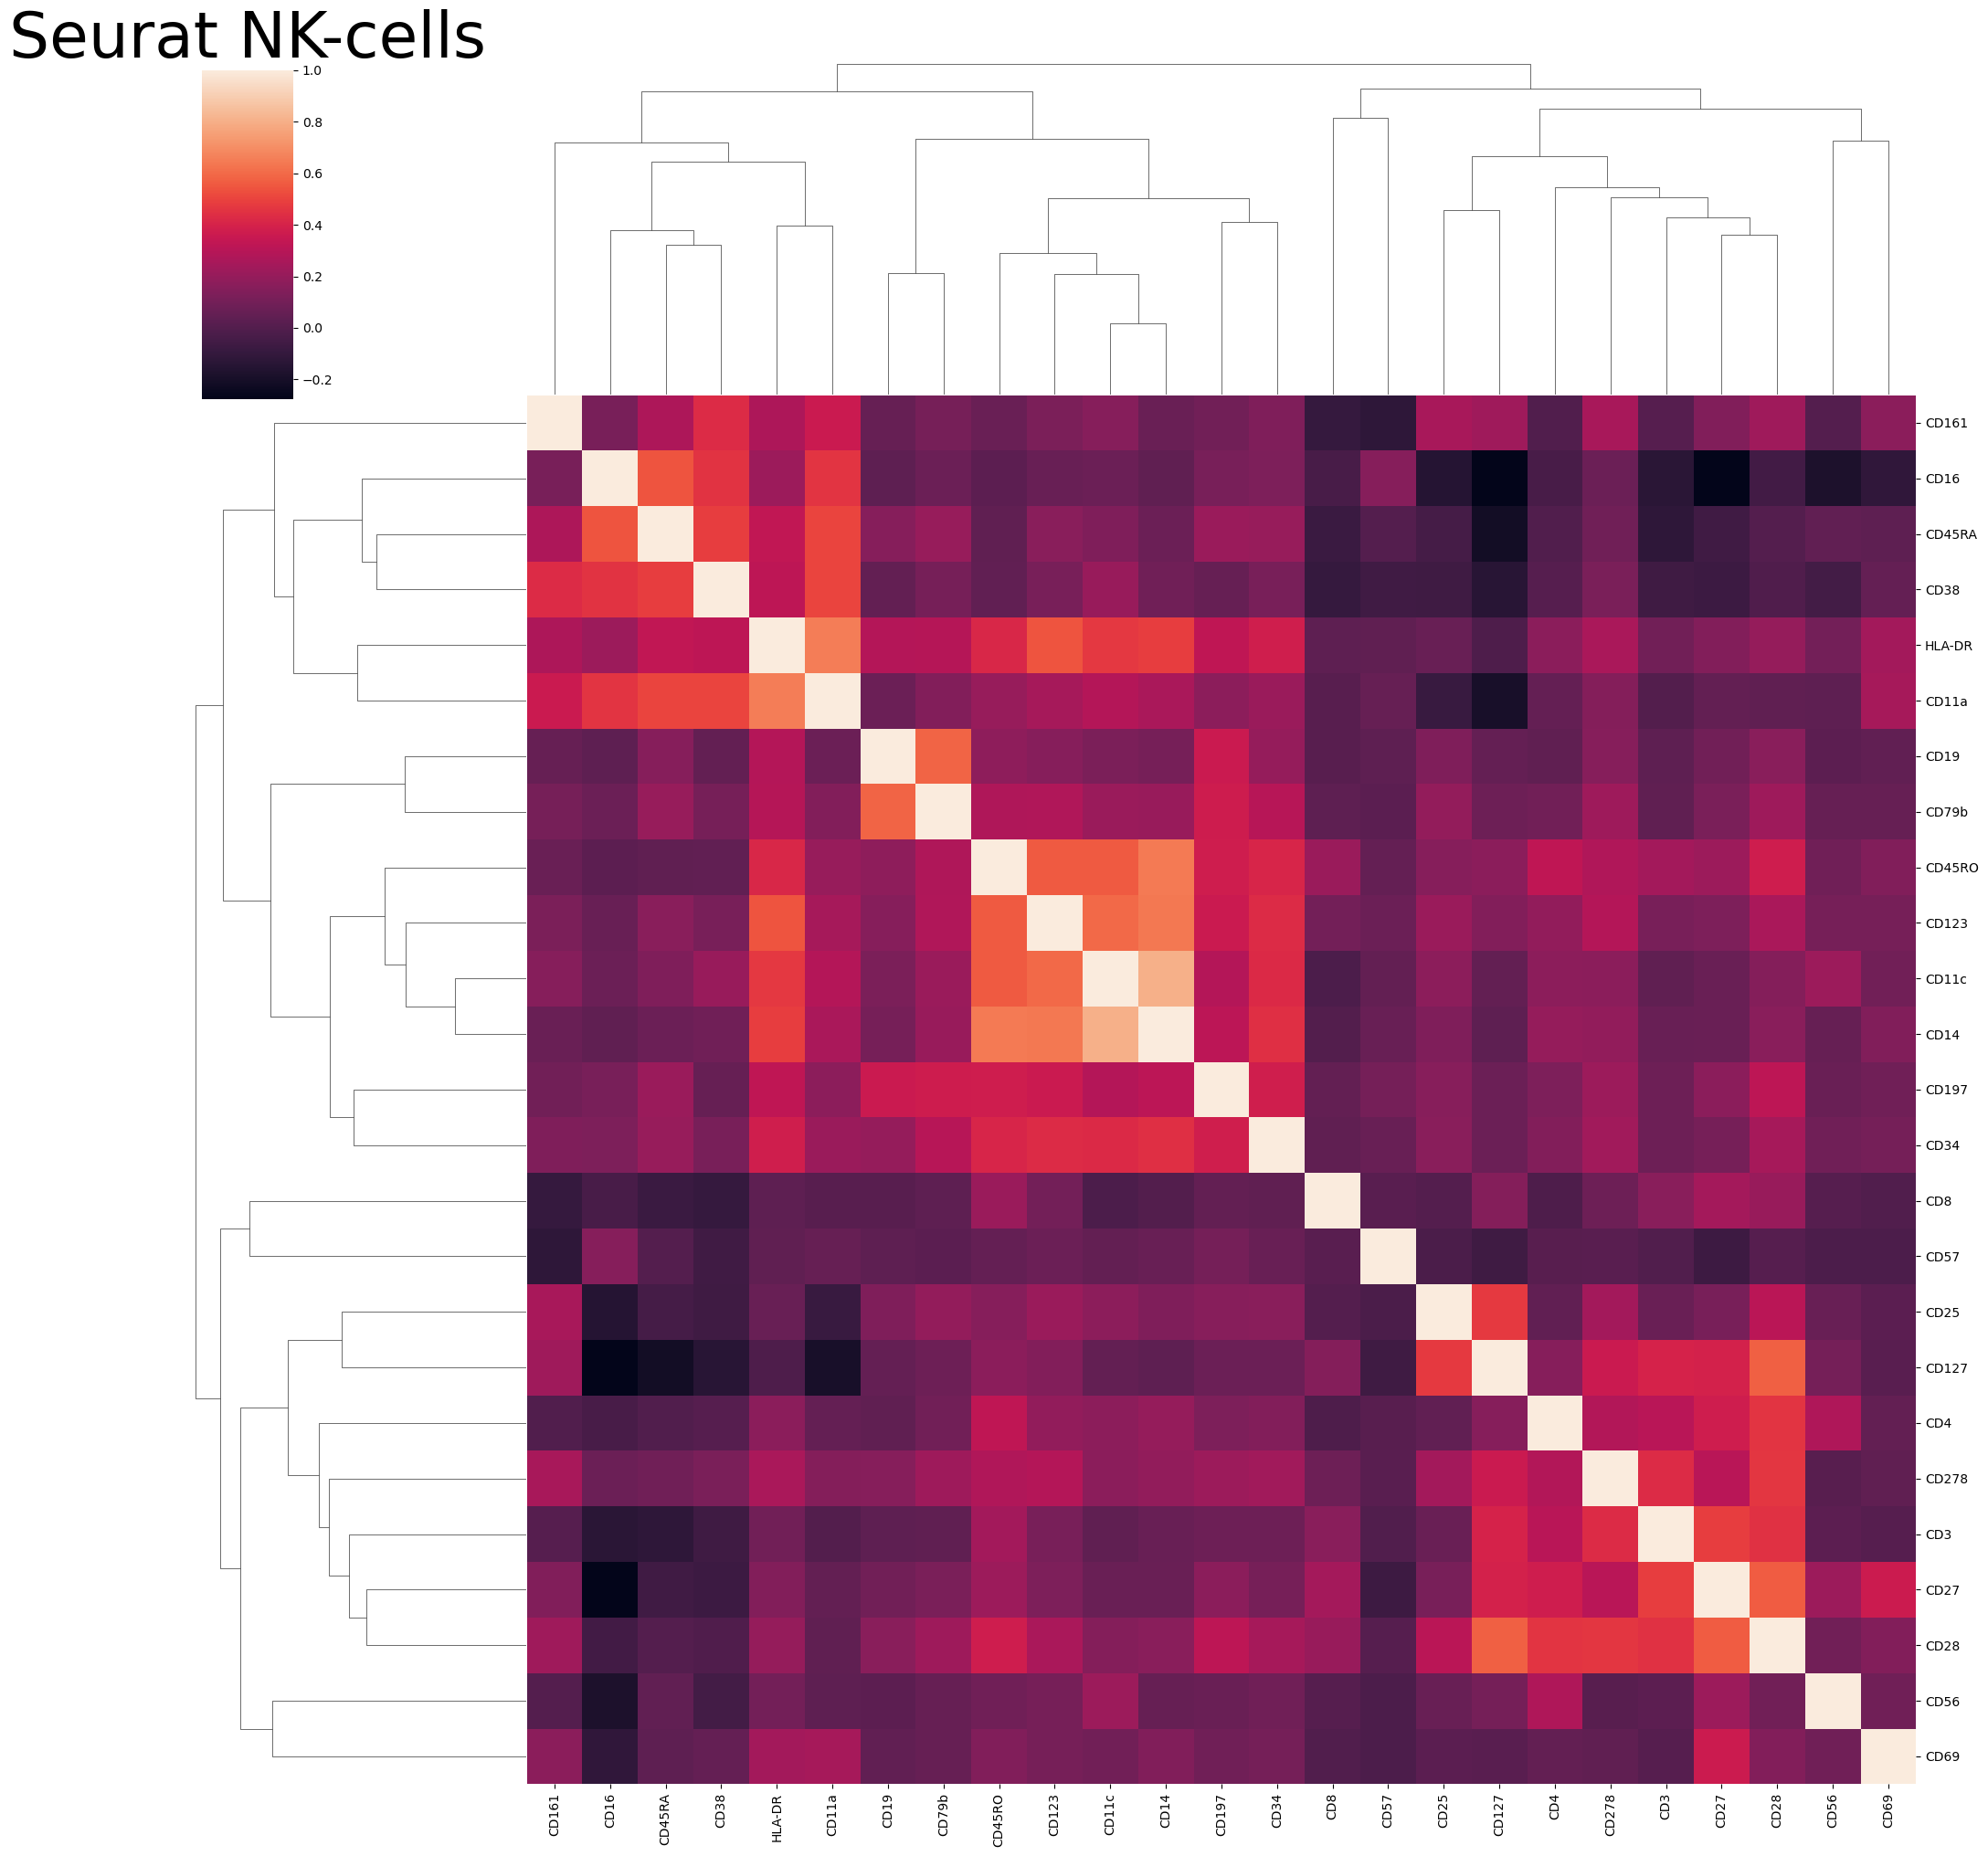

In [50]:
#Neurips
matrix3=neurips_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('Neurips NK-cells', fontsize = 50) ;


#Granja
matrix4=granja_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix4, figsize=(20,20))
plt.title('Granja NK-cells', fontsize = 50) ;

#Easigenomics
matrix5=easi_nkt_prot.corr(method='pearson', min_periods=1) #NK +T
sns.clustermap(matrix5, figsize=(20,20))
plt.title('Easigenomics T- and NK-cells', fontsize = 50) ;

#Seurat
matrix6=seurat_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix6, figsize=(20,20))
plt.title('Seurat NK-cells', fontsize = 50) ;


### UMAPS 

In [51]:
#Adding protein information to obs for UMAP, Granja
a = granja_nk.obs
b = granja_nk_prot

granja_umap_nk=pd.concat([a, b], axis=1)
granja_nk.obs=granja_umap_nk


In [52]:
#Adding protein information to obs for UMAP, Easigenomics 

a = easi_nkt.obs
b = easi_nkt_prot

easi_umap_nkt=pd.concat([a, b], axis=1)

easi_nkt.obs=easi_umap_nkt

In [53]:
easi_nkt.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD38,CD127,CD45,CD73,CD197,CD34,CD10,CD15,CD117,CD66ace
AAACCTGAGCCCTAAT-1-100,NKT,1104,0.072933,0.140216,1947.0,NaN,NaN,NaN,NaN,False,...,10,14,50,8,17,25,17,43,11,25
AAACCTGCAGACGCTC-1-100,NKT,1928,0.035144,0.433632,7142.0,NaN,NaN,NaN,NaN,False,...,16,7,126,18,28,34,12,51,14,21
AAACCTGTCCTTAATC-1-100,NKT,1750,0.029976,0.421151,5371.0,NaN,NaN,NaN,NaN,False,...,9,12,66,10,20,27,16,30,10,17
AAACGGGGTCTCTCGT-1-100,NKT,1729,0.069098,0.063340,3126.0,NaN,NaN,NaN,NaN,False,...,9,17,109,13,22,21,19,43,7,25
AAAGATGTCCAGTAGT-1-100,NKT,2025,0.047019,0.288148,5636.0,NaN,NaN,NaN,NaN,False,...,9,11,96,16,19,22,7,47,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGGCACAGAAGCAC-1-158,NKT,1728,0.022962,0.210951,3963.0,NaN,NaN,NaN,NaN,False,...,2,5,82,6,4,15,105,9,4,4
TTCTACAGTGAGCGAT-1-158,NKT,1734,0.034010,0.263274,4087.0,NaN,NaN,NaN,NaN,False,...,1,7,87,12,4,11,68,7,1,7
TTGAACGAGCGGATCA-1-158,NKT,1589,0.016802,0.177578,3452.0,NaN,NaN,NaN,NaN,False,...,5,5,133,16,5,10,40,6,1,9
TTGCCGTAGATCCGAG-1-158,NKT,2140,0.034307,0.258895,6296.0,NaN,NaN,NaN,NaN,False,...,5,13,138,23,4,23,151,11,4,8


In [54]:
#Adding protein information to obs for UMAP, Easigenomics 

a = neurips_nk.obs
b = neurips_nk_prot

neurips_umap_nk=pd.concat([a, b], axis=1)

neurips_nk.obs=neurips_umap_nk

In [55]:
#Adding protein information to obs for UMAP, Easigenomics 

a = seurat_nk.obs
b = seurat_nk_prot

seurat_umap_nk=pd.concat([a, b], axis=1)

seurat_nk.obs=seurat_umap_nk

In [69]:
#NK-cell markers

markers= ['CD56', 'CD16']


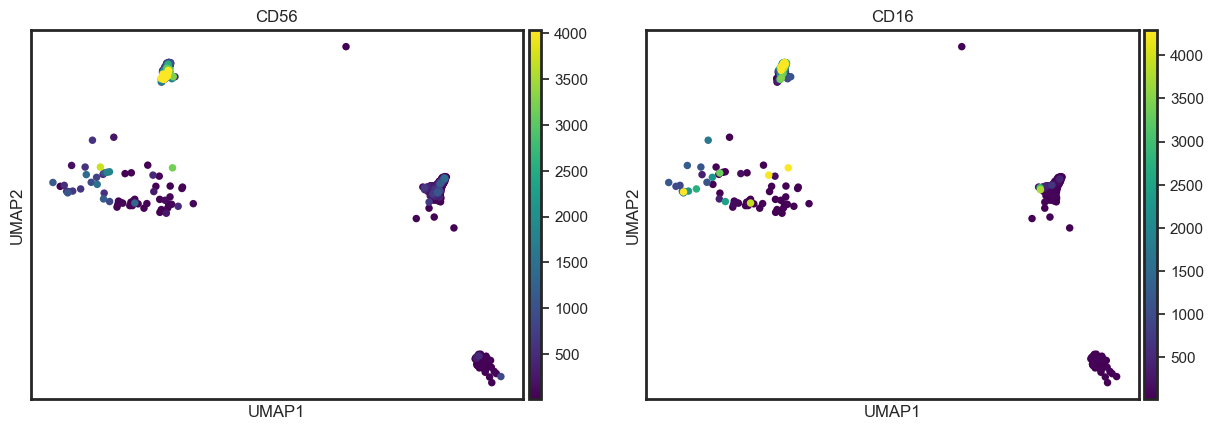

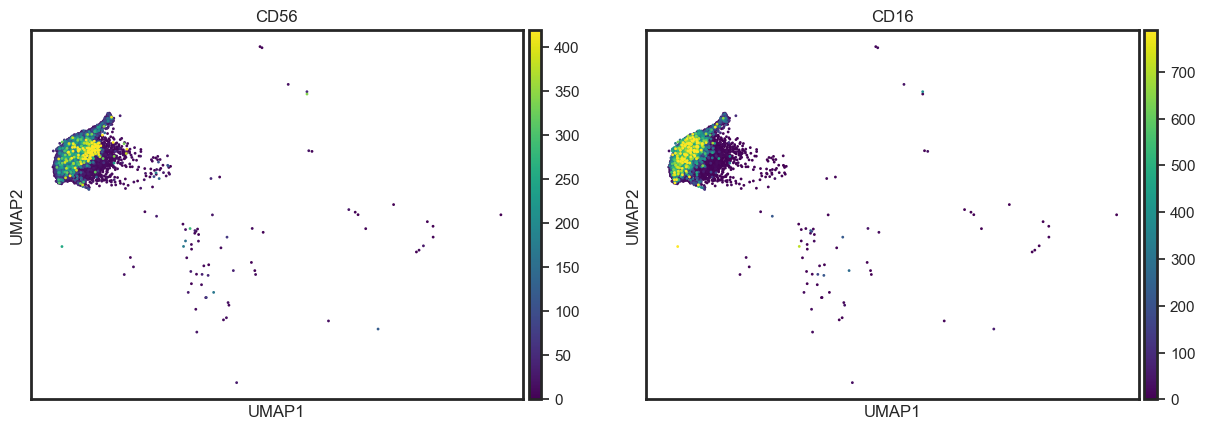

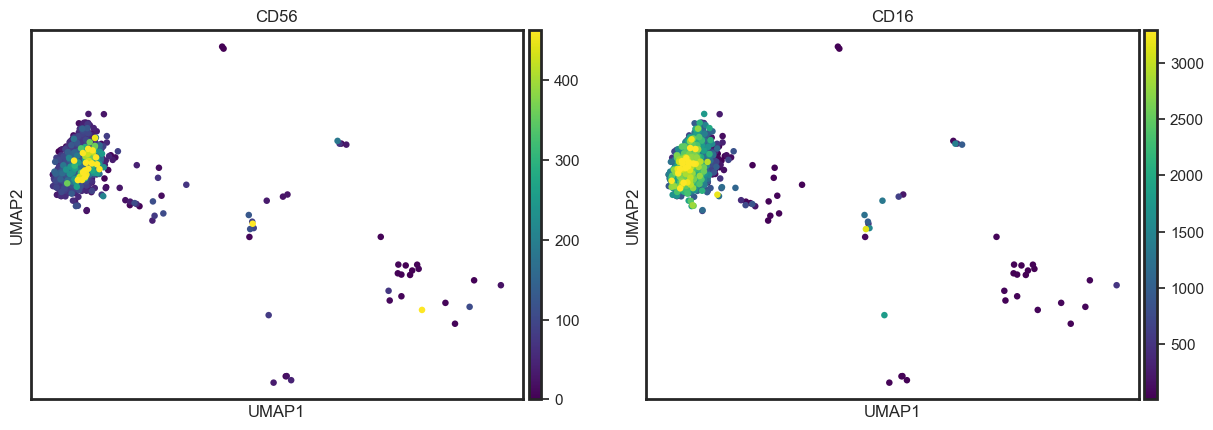

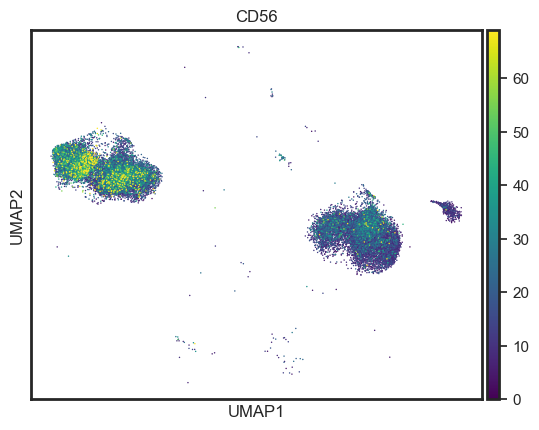

In [70]:
#Granja
sc.pl.umap(granja_nk, color = markers,vmax="p99", color_map = 'viridis')

#Neurips

sc.pl.umap(neurips_nk, color = markers, vmax="p99", color_map = 'viridis')

#Seurat

sc.pl.umap(seurat_nk, color = markers, vmax="p99", color_map = 'viridis')

#CD16 not used in easigenomics

sc.pl.umap(easi_nkt, color = "CD56", vmax="p99", color_map = 'viridis')

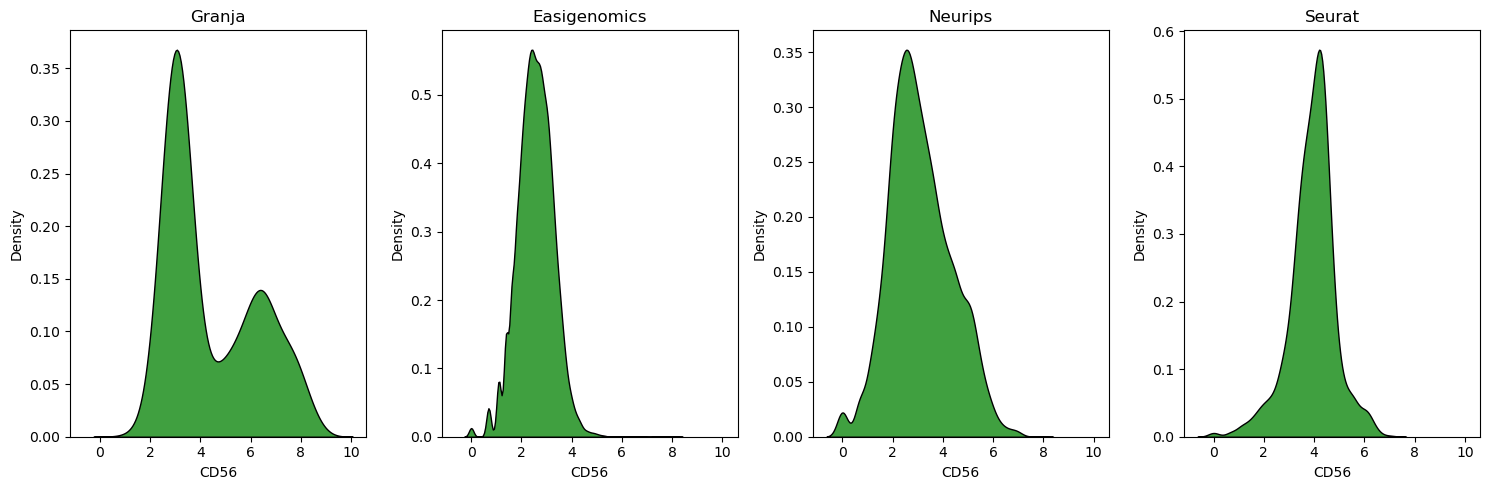

In [61]:
#NK-cells, log transformed protein counts

markers = ['CD56']

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_nk_prot), x=column_name, multiple="stack", color= "g", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

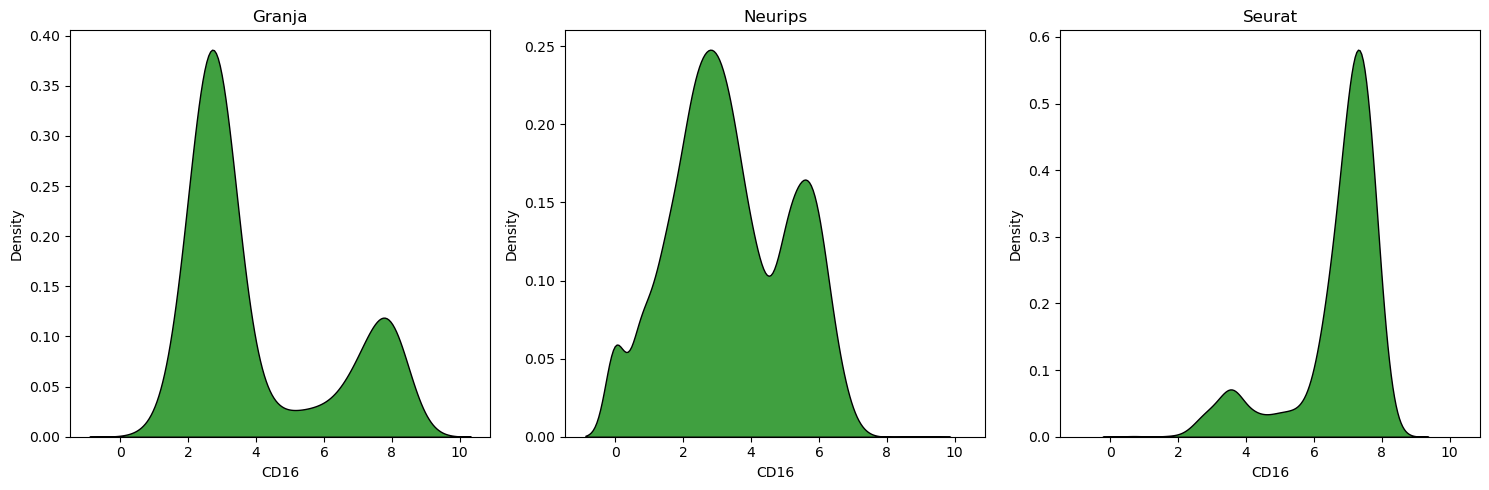

In [62]:
#NK-cells, log-normalized protein counts

markers = ['CD16'] #not detected in easigenomics

for column_name in markers:
    fig, ax =plt.subplots(1,3 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[0]) ;
    #ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[2]) ;

    ax1.title.set_text('Granja')    
    #ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [63]:
granja_col=granja_nk_prot.columns

granja_col
#
easi_col=easi_nkt_prot.columns

easi_col

neurips_col = neurips_nk_prot.columns

neurips_col

seurat_col=seurat_nk_prot.columns

seurat_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD11c', 'CD45RA', 'CD123', 'CD4', 'CD14',
       'CD16', 'CD25', 'CD45RO', 'CD69', 'CD161', 'CD27', 'HLA-DR', 'CD57',
       'CD278', 'CD11a', 'CD79b', 'CD28', 'CD38', 'CD127', 'CD197', 'CD34'],
      dtype='object')

In [64]:
#Finding common markers from all lists (only NK/NKT cells)

markers_all=set(granja_col).intersection(easi_col, neurips_col, seurat_col)

In [65]:
x=np.log(granja_nk_prot[markers_all])
x["dataset"]="Granja"

y=np.log(easi_nkt_prot[markers_all])
y["dataset"]="Easigenomics"

z=np.log(neurips_nk_prot[markers_all])
z["dataset"]="Neurips"

å=np.log(seurat_nk_prot[markers_all])
å["dataset"]="Seurat"

df_nk=pd.concat([x,y,z,å])

df_nk

,CD8,CD19,CD45RO,CD3,CD127,CD56,CD14,CD4,CD45RA,dataset
BMMC_D1T1:AAAGAACTCGAAGAAT-1,9.326077,3.091042,6.180017,7.901377,5.220356,3.433987,3.583519,4.158883,6.375025,Granja
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,8.888619,1.945910,6.846943,7.589842,4.624973,2.639057,3.044522,3.637586,5.231109,Granja
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,3.713572,2.397895,2.833213,3.258097,2.995732,6.511745,3.258097,2.944439,9.173054,Granja
BMMC_D1T1:AAAGTGAGTTACCCAA-1,8.901367,1.609438,4.060443,7.493874,6.452049,3.218876,2.833213,3.295837,6.885510,Granja
BMMC_D1T1:AACAAAGAGTCTGCGC-1,8.496378,2.079442,5.225747,7.722235,2.708050,2.890372,2.772589,3.871201,5.874931,Granja
...,...,...,...,...,...,...,...,...,...,...
b_TTTATGCTCAACACAC-1,4.828314,3.044522,2.772589,4.189655,2.708050,3.526361,2.772589,2.772589,7.226936,Seurat
b_TTTCCTCAGATCCCGC-1,4.304065,2.639057,2.197225,3.761200,3.526361,3.526361,2.890372,2.995732,6.003887,Seurat
b_TTTCCTCAGTACATGA-1,5.135798,2.197225,2.484907,3.713572,3.784190,5.811141,2.302585,2.302585,7.140453,Seurat
b_TTTGCGCGTGGTCTCG-1,6.244167,3.135494,2.197225,3.688879,3.091042,4.127134,3.044522,2.397895,7.026427,Seurat


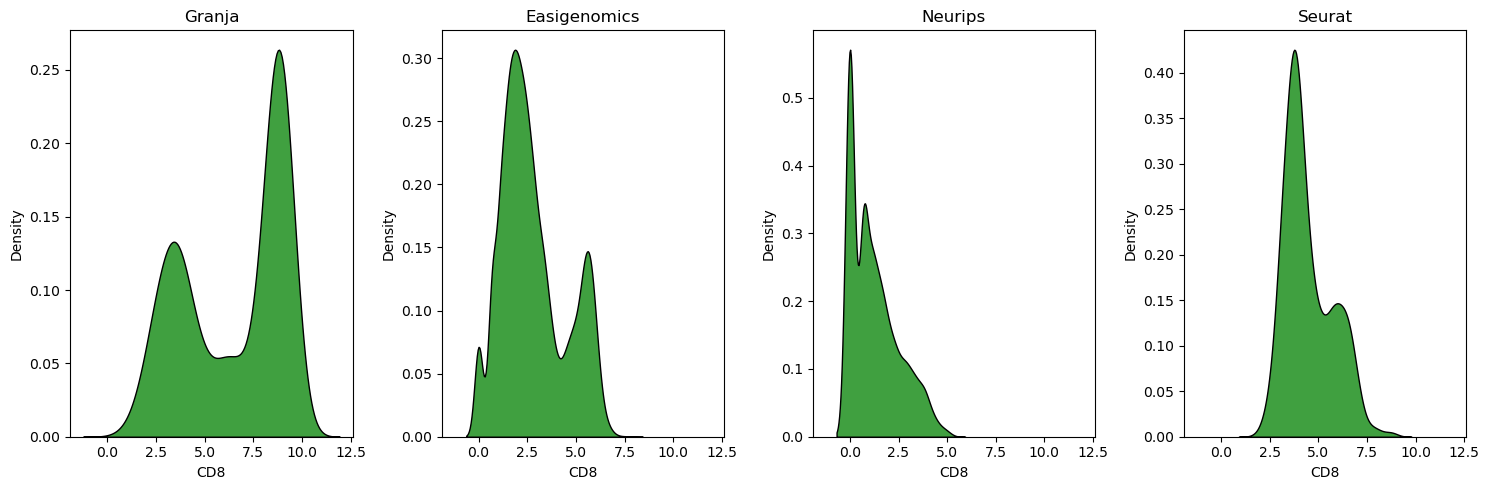

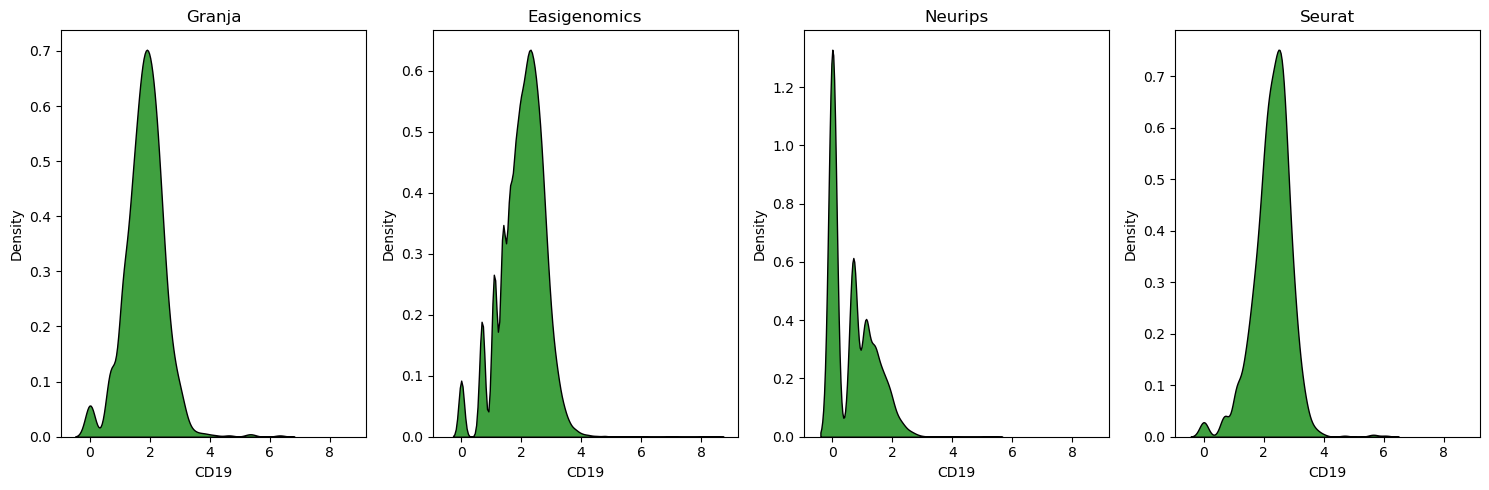

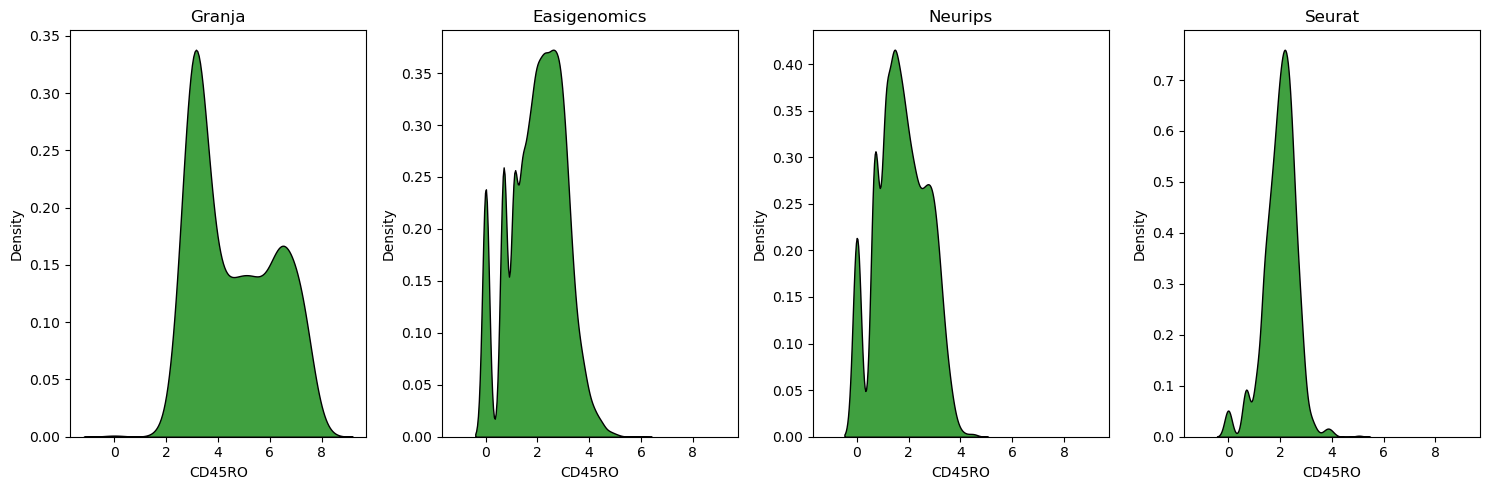

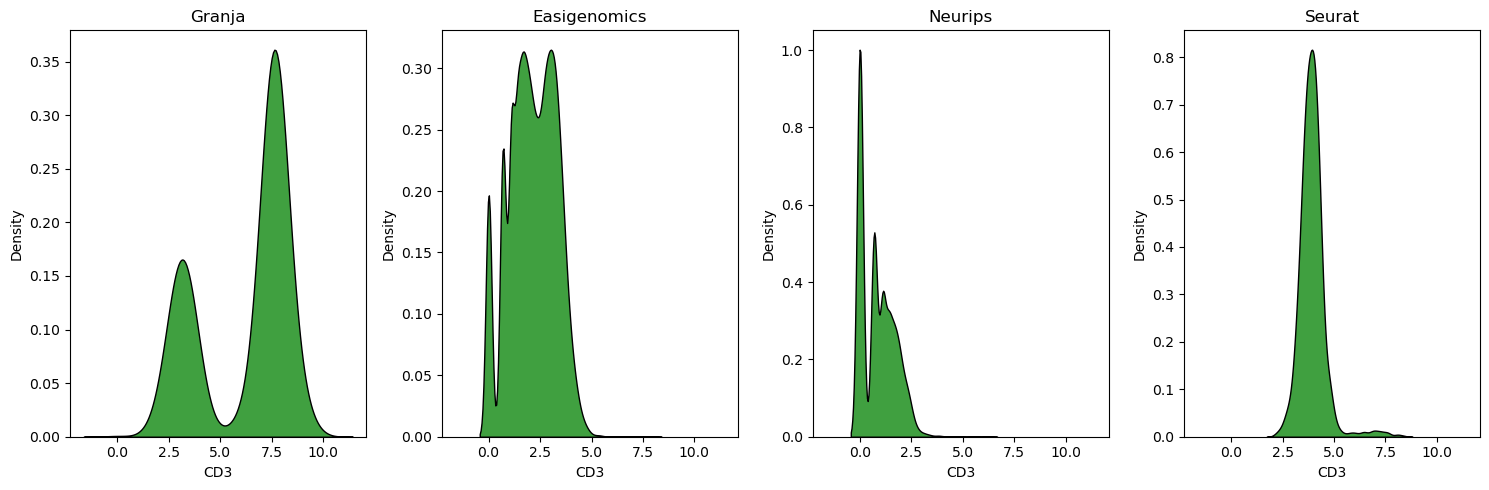

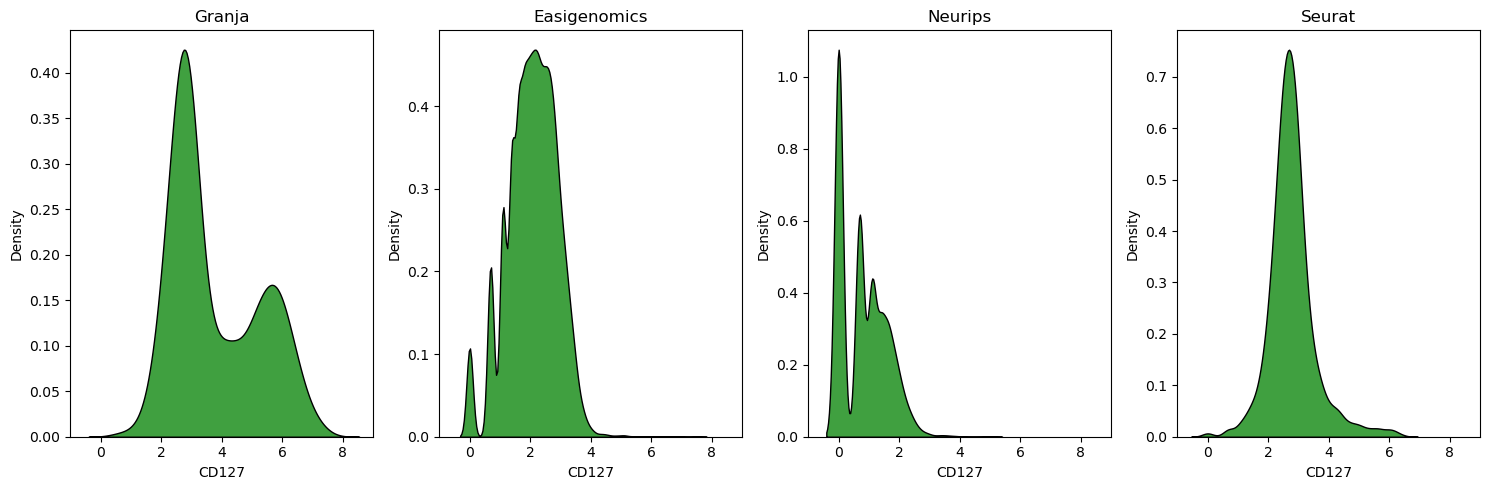

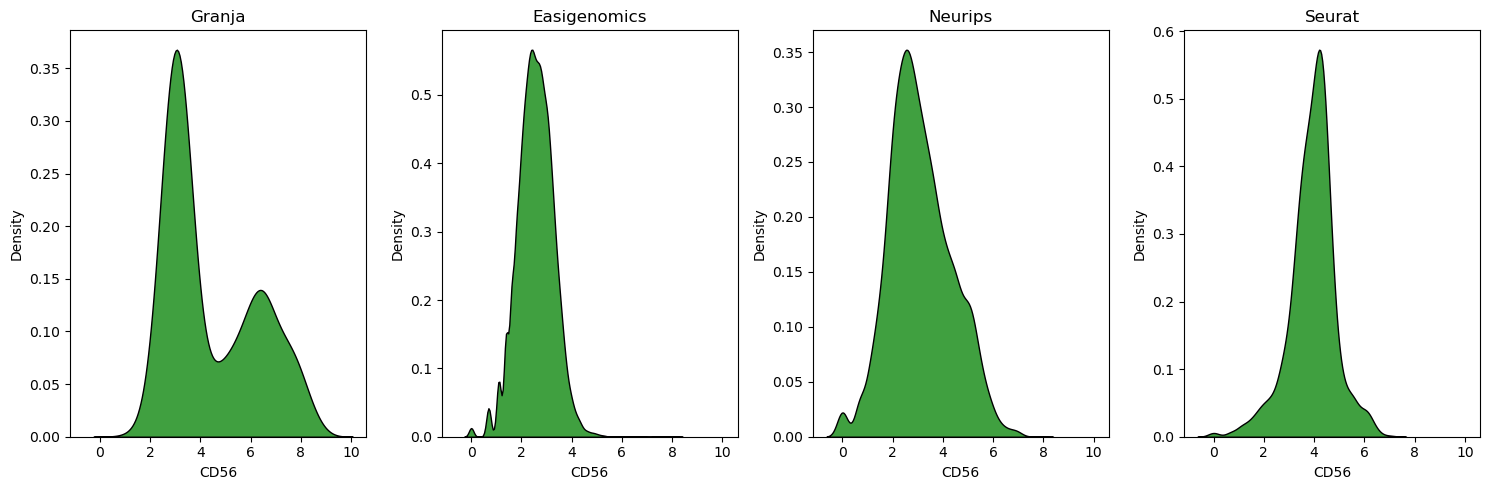

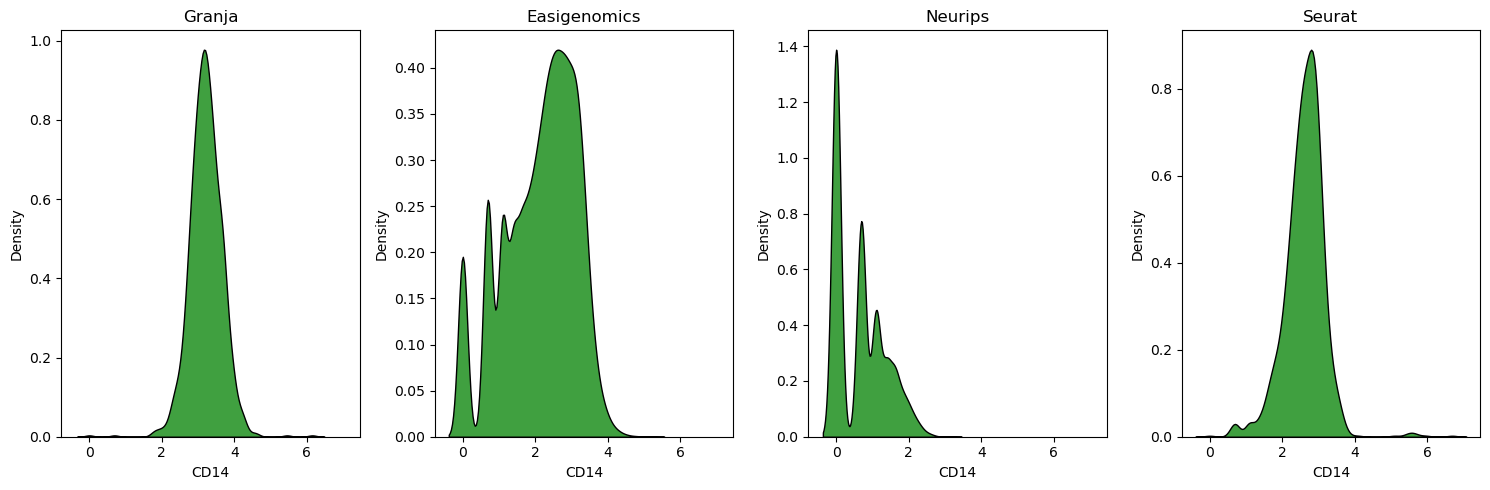

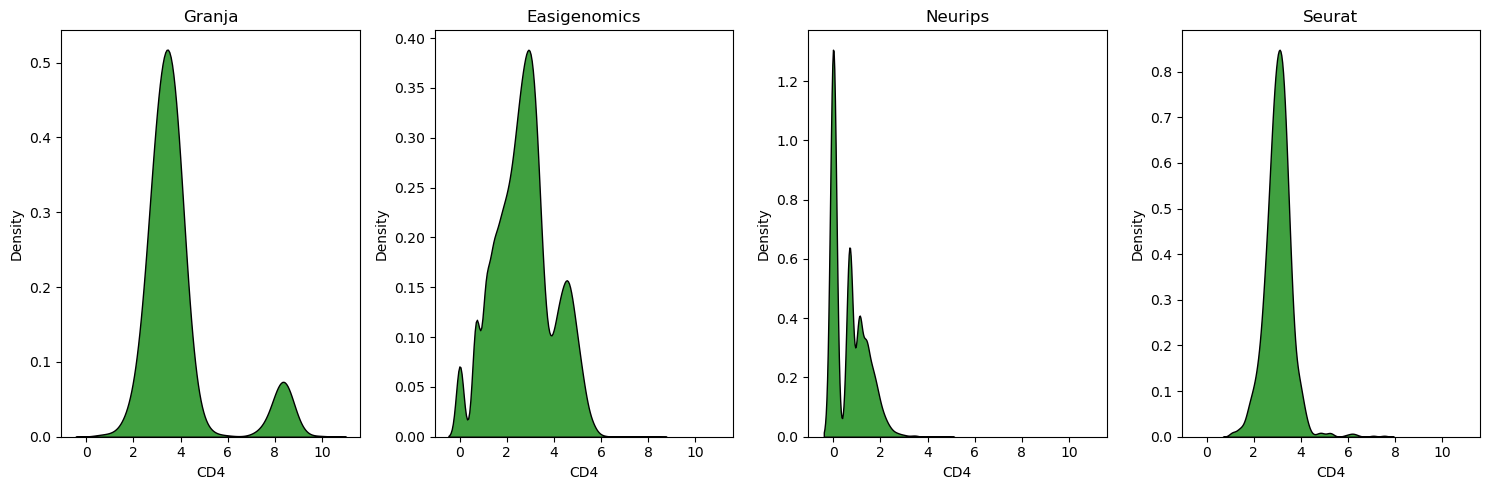

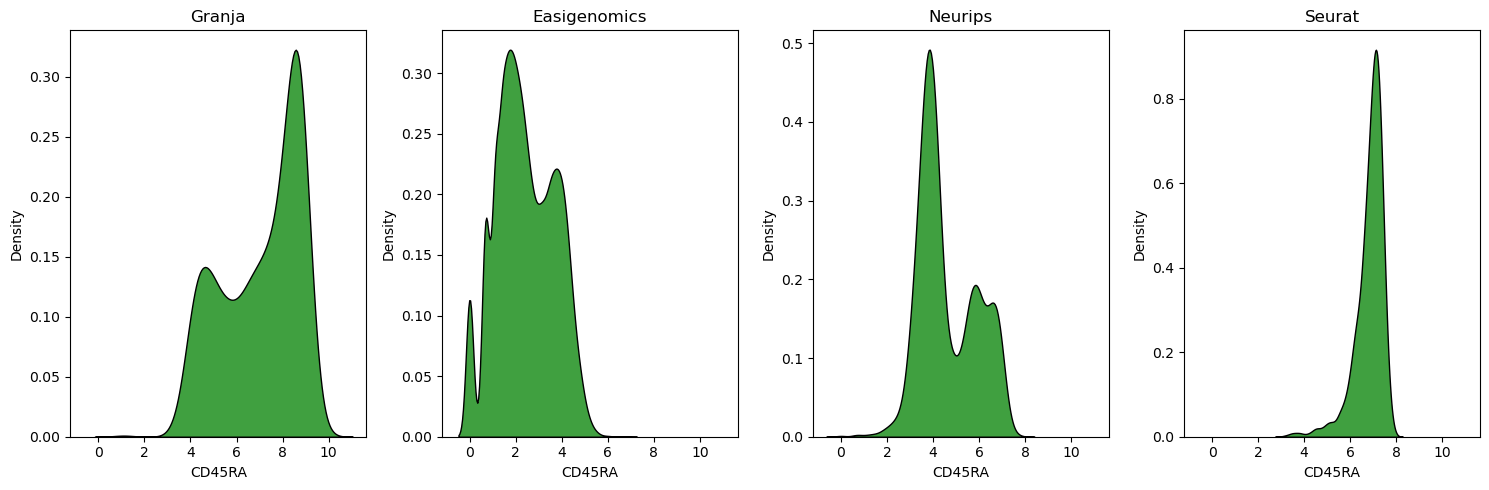

In [66]:
#All markers that are common between datasets, shared x-axis, log-normalized
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True)
    fig.show()

    ax1 = sns.kdeplot(data=np.log(granja_nk_prot), x=column_name, multiple="stack",color="g", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=np.log(easi_nkt_prot), x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=np.log(neurips_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=np.log(seurat_nk_prot), x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

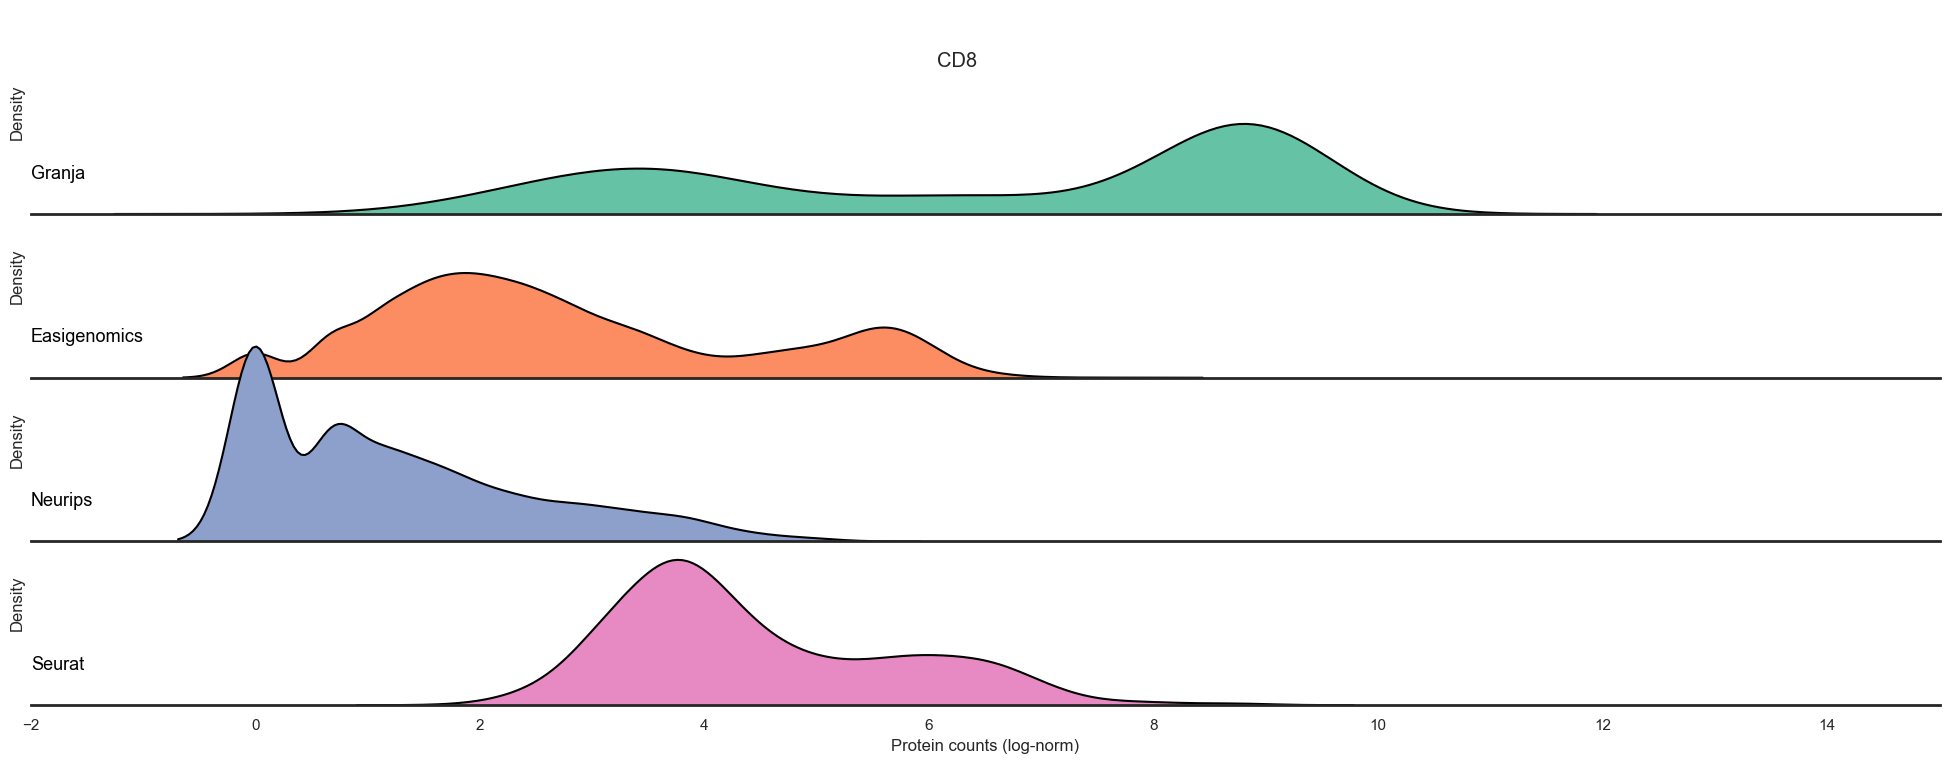

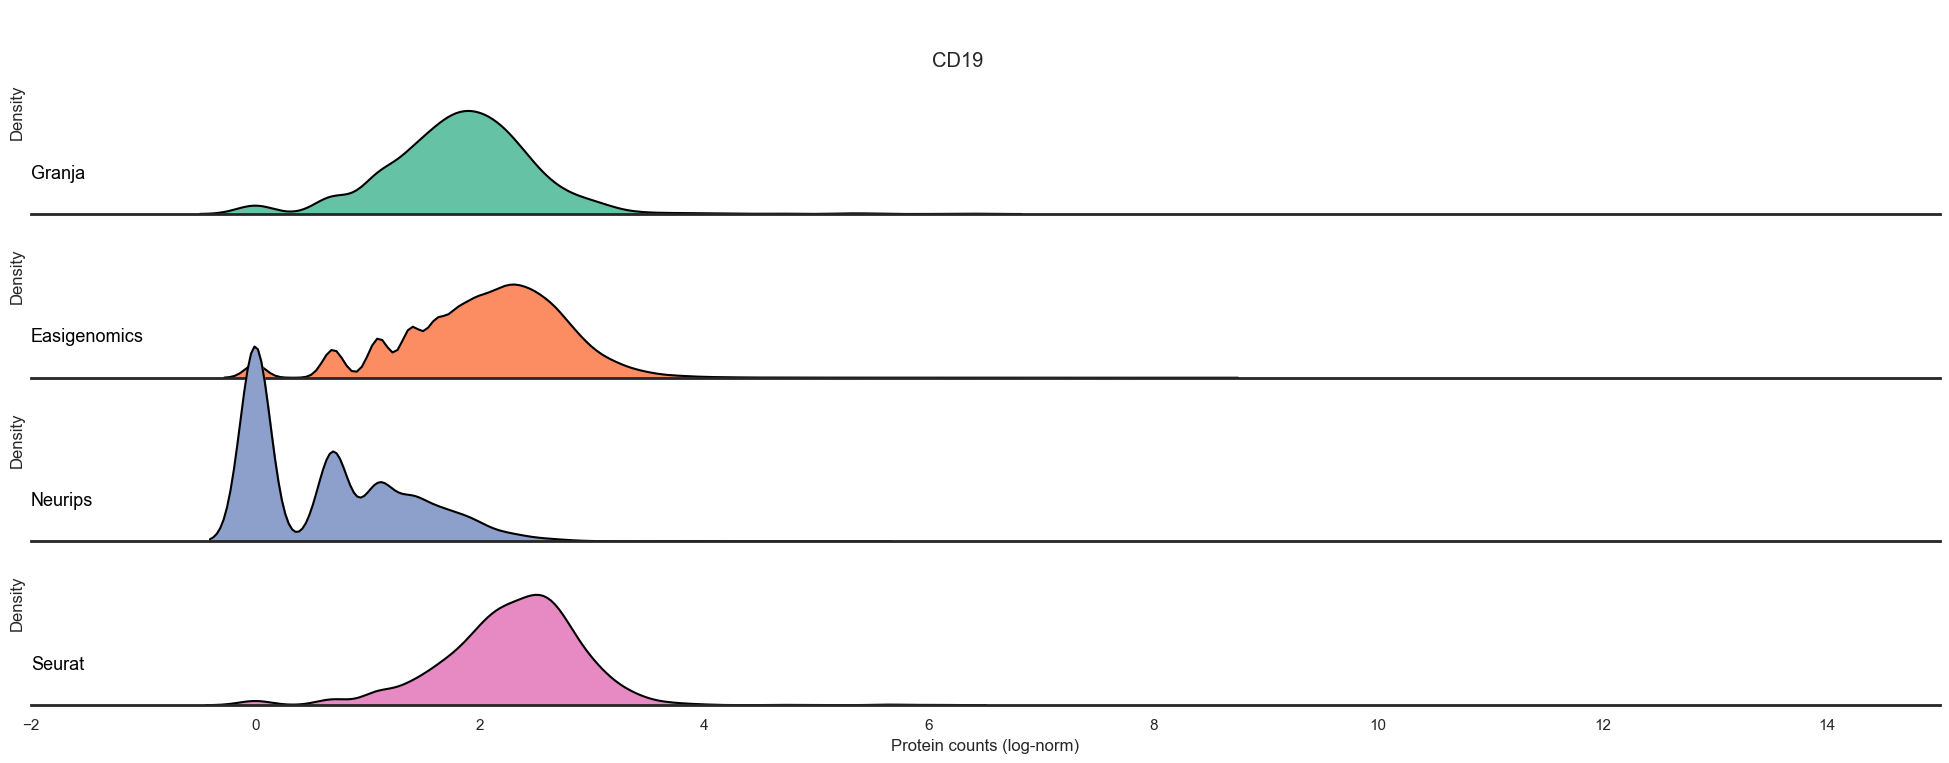

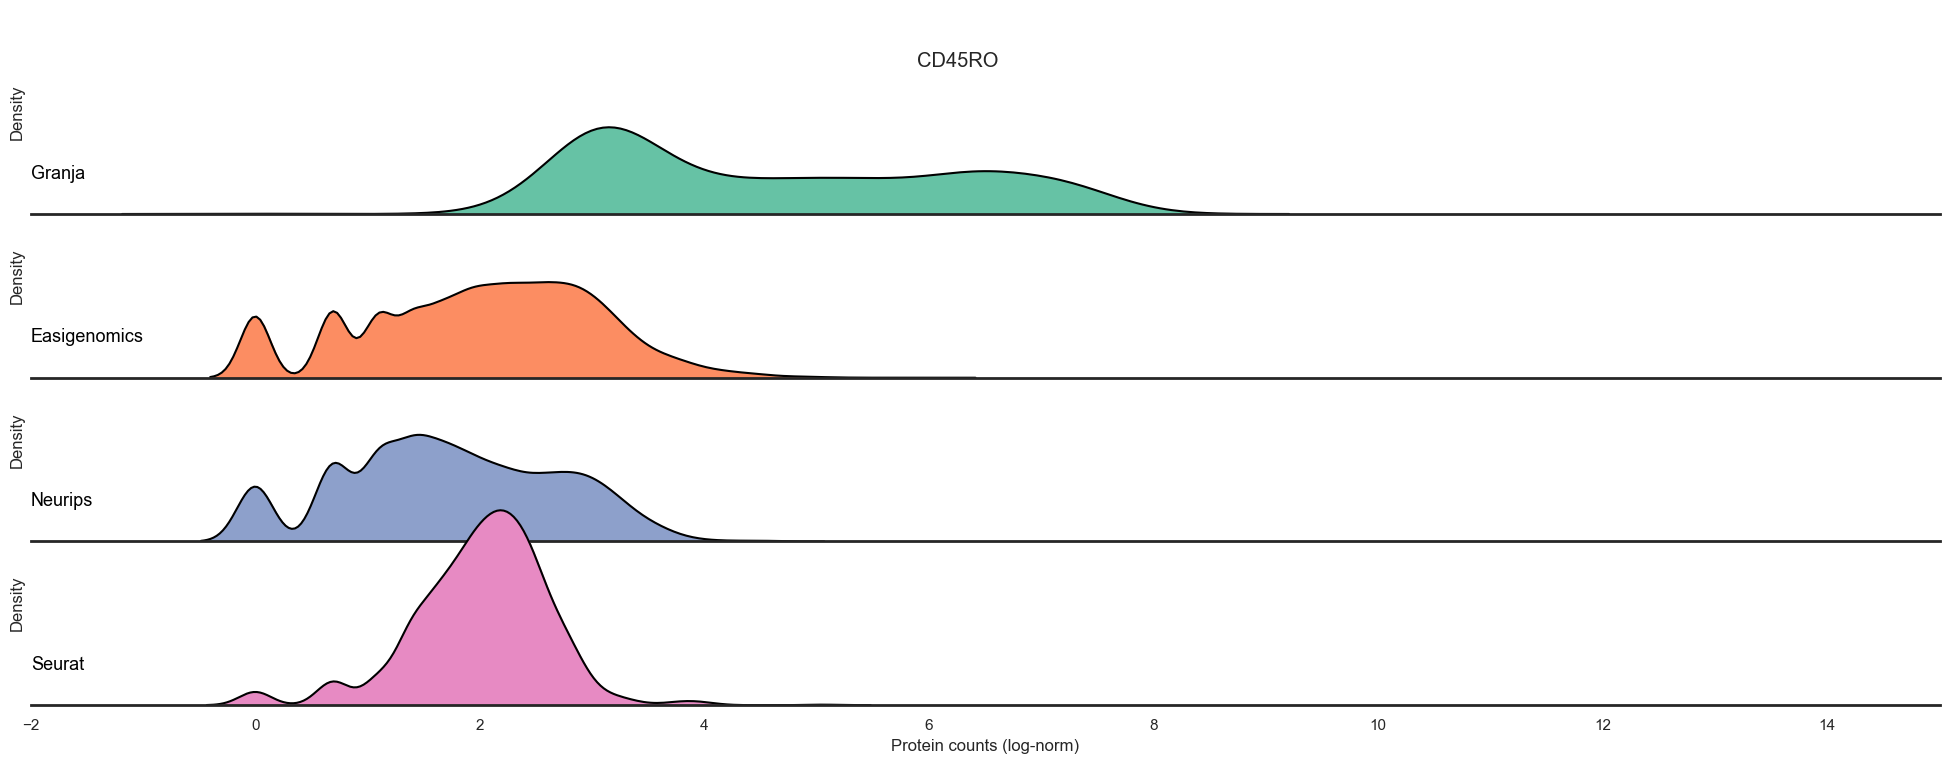

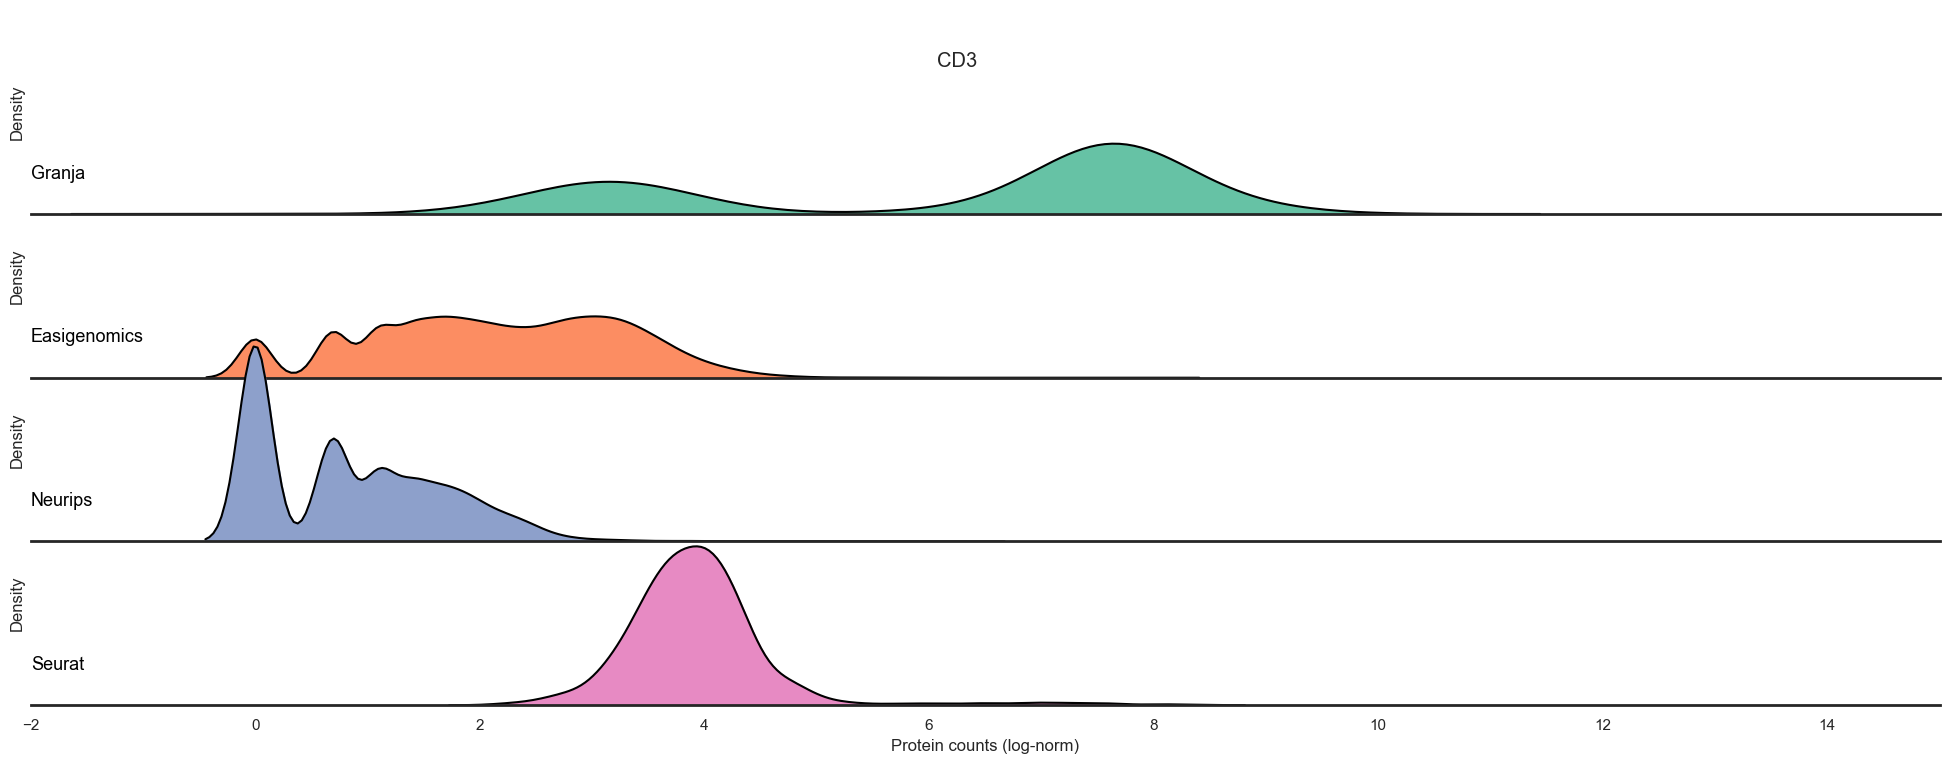

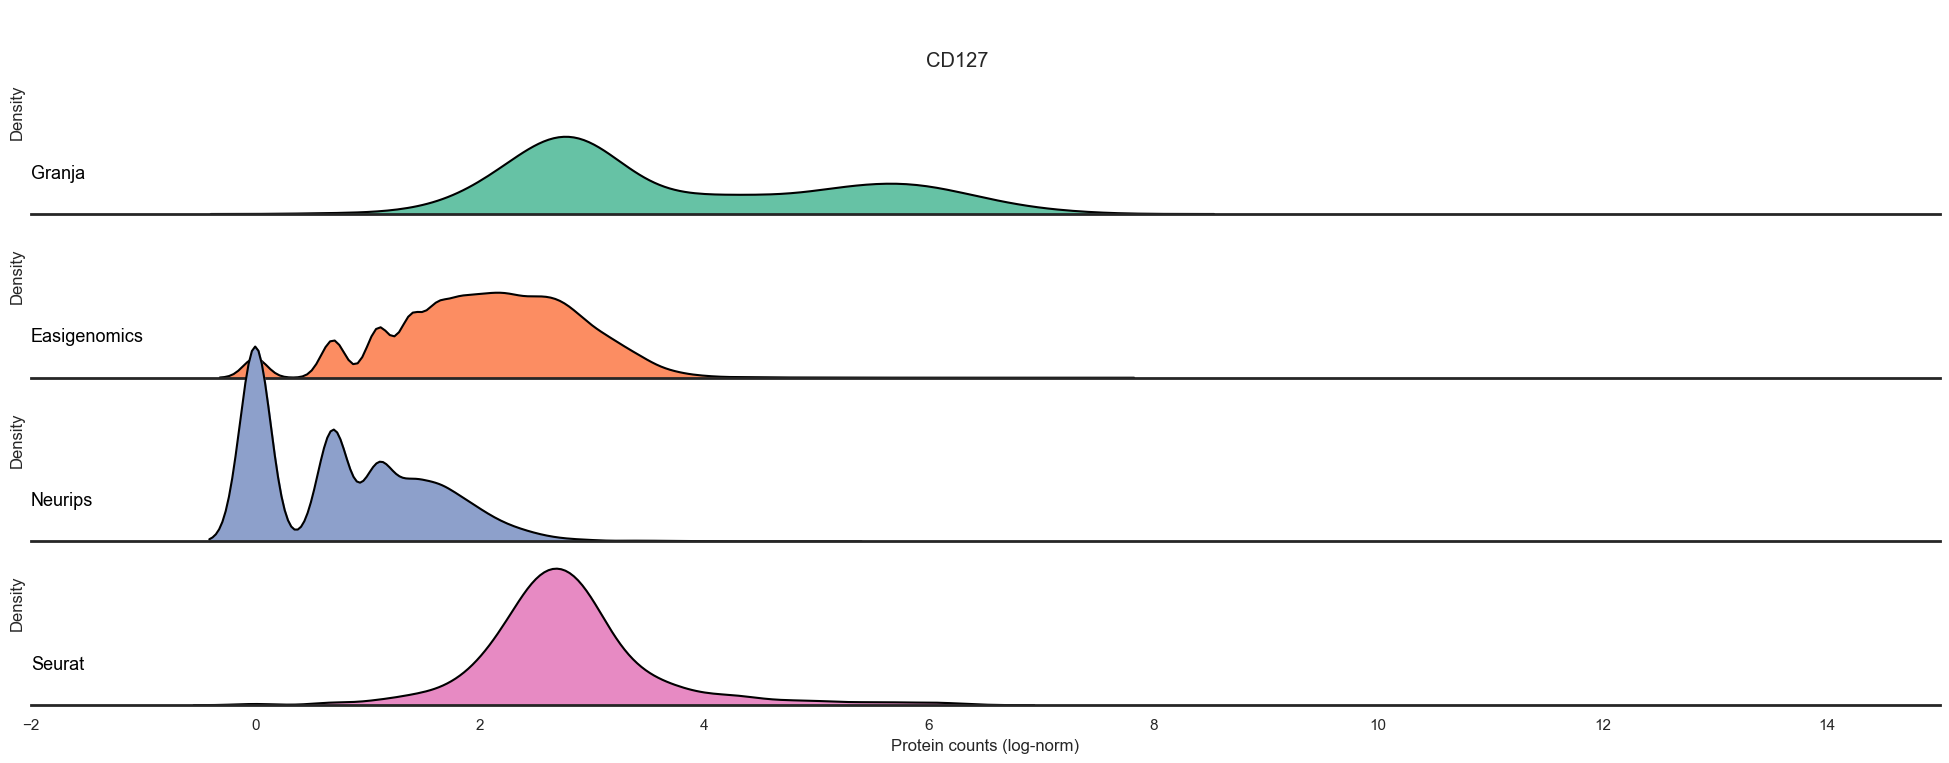

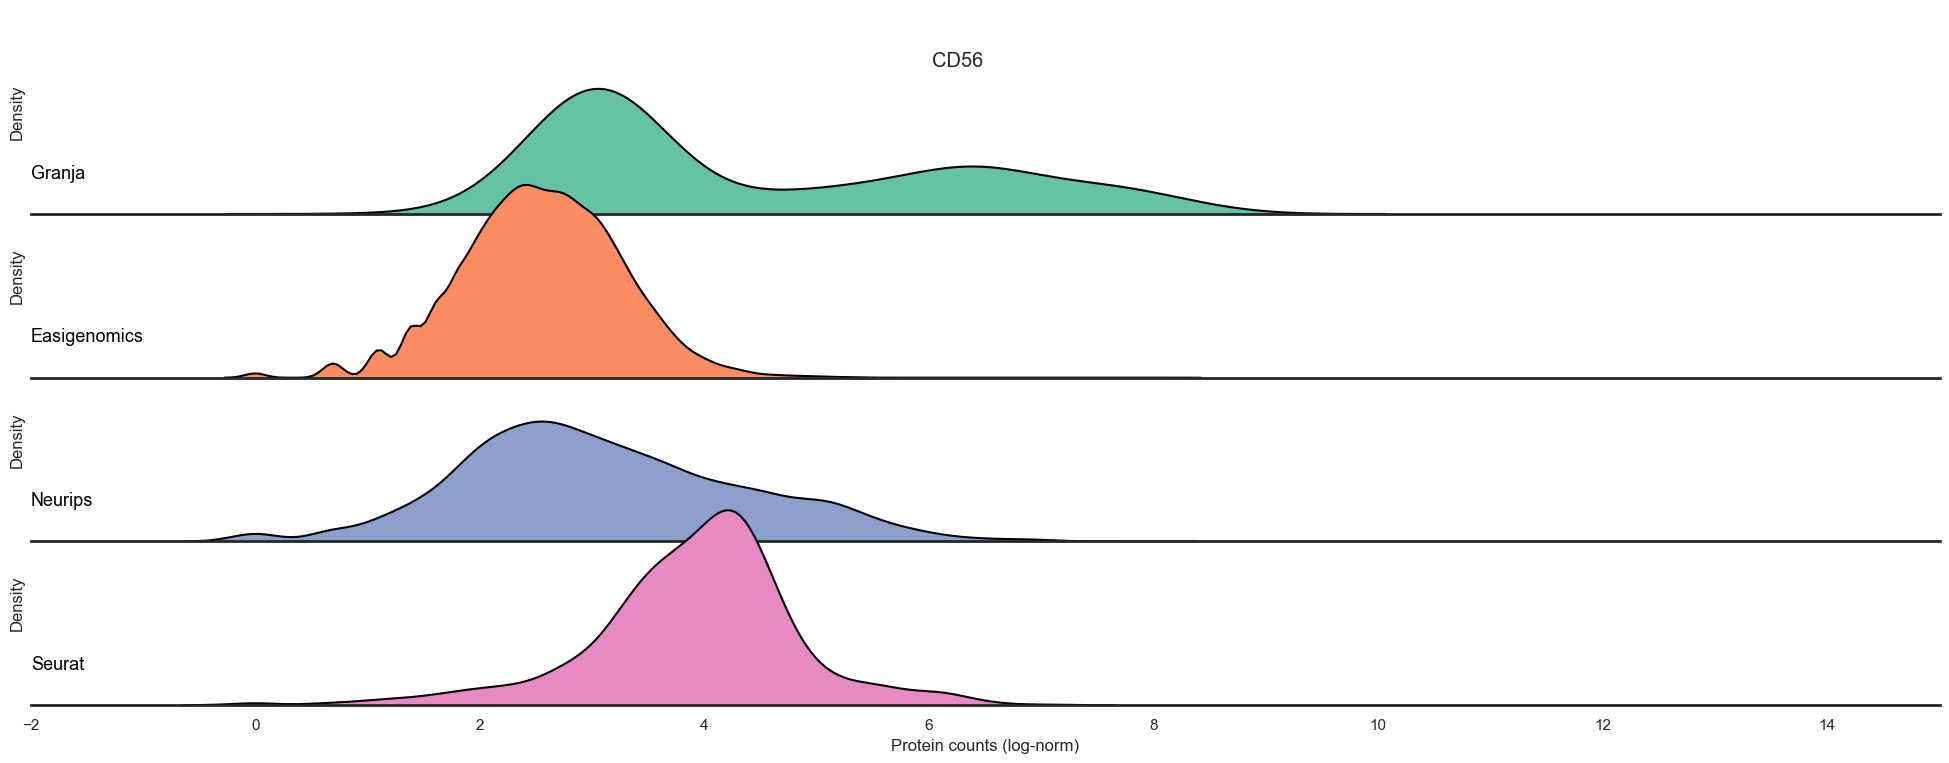

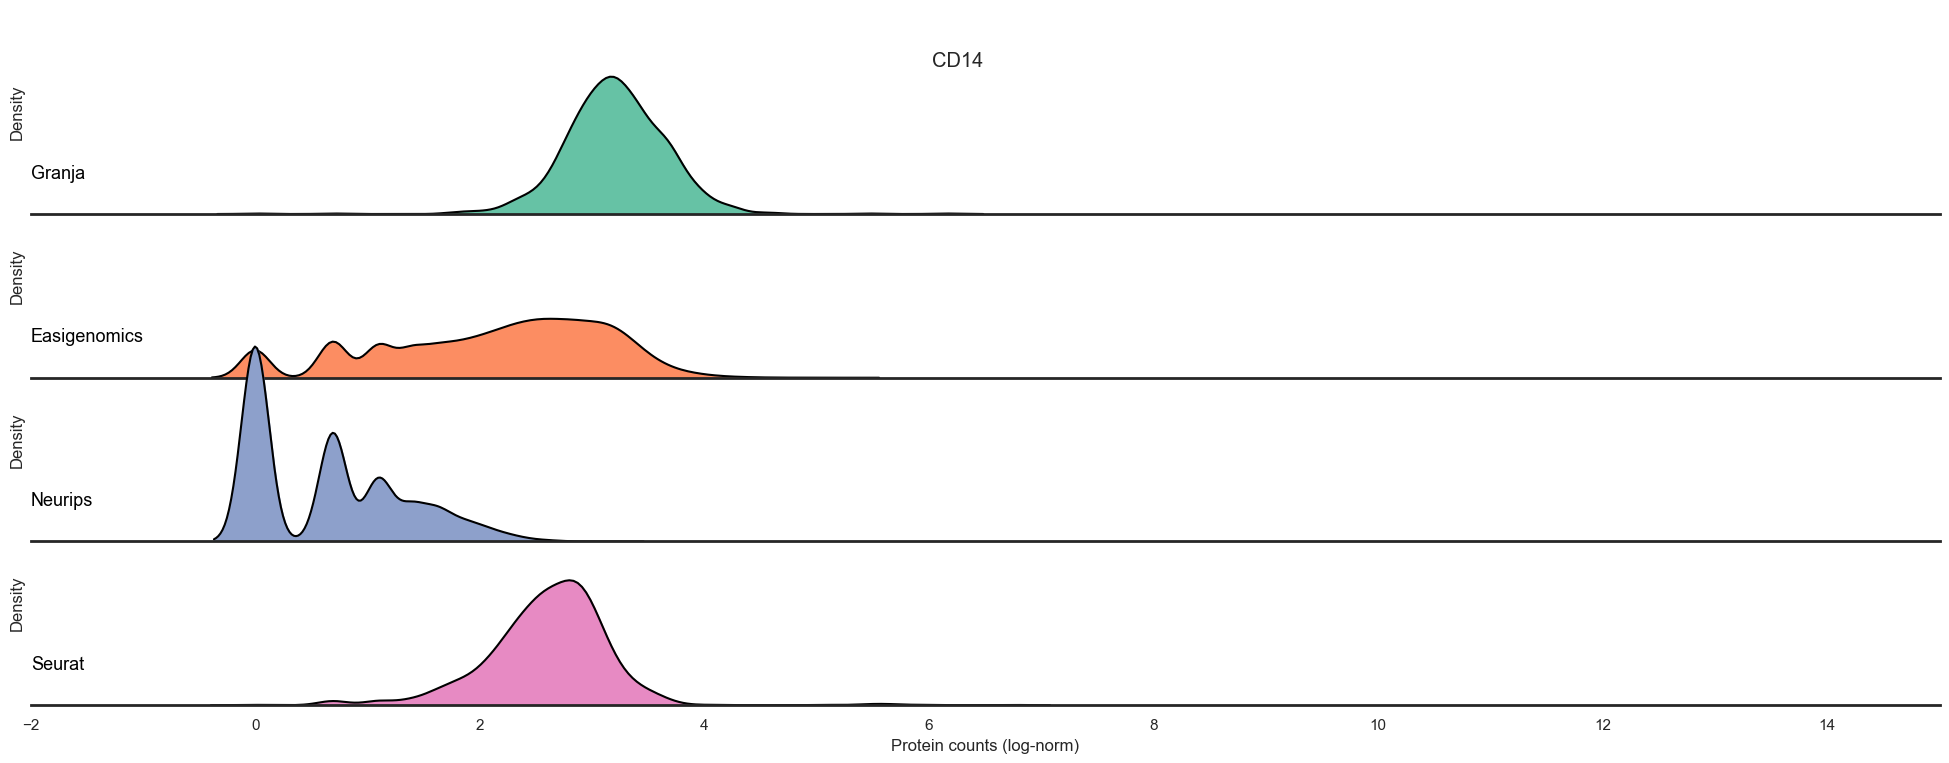

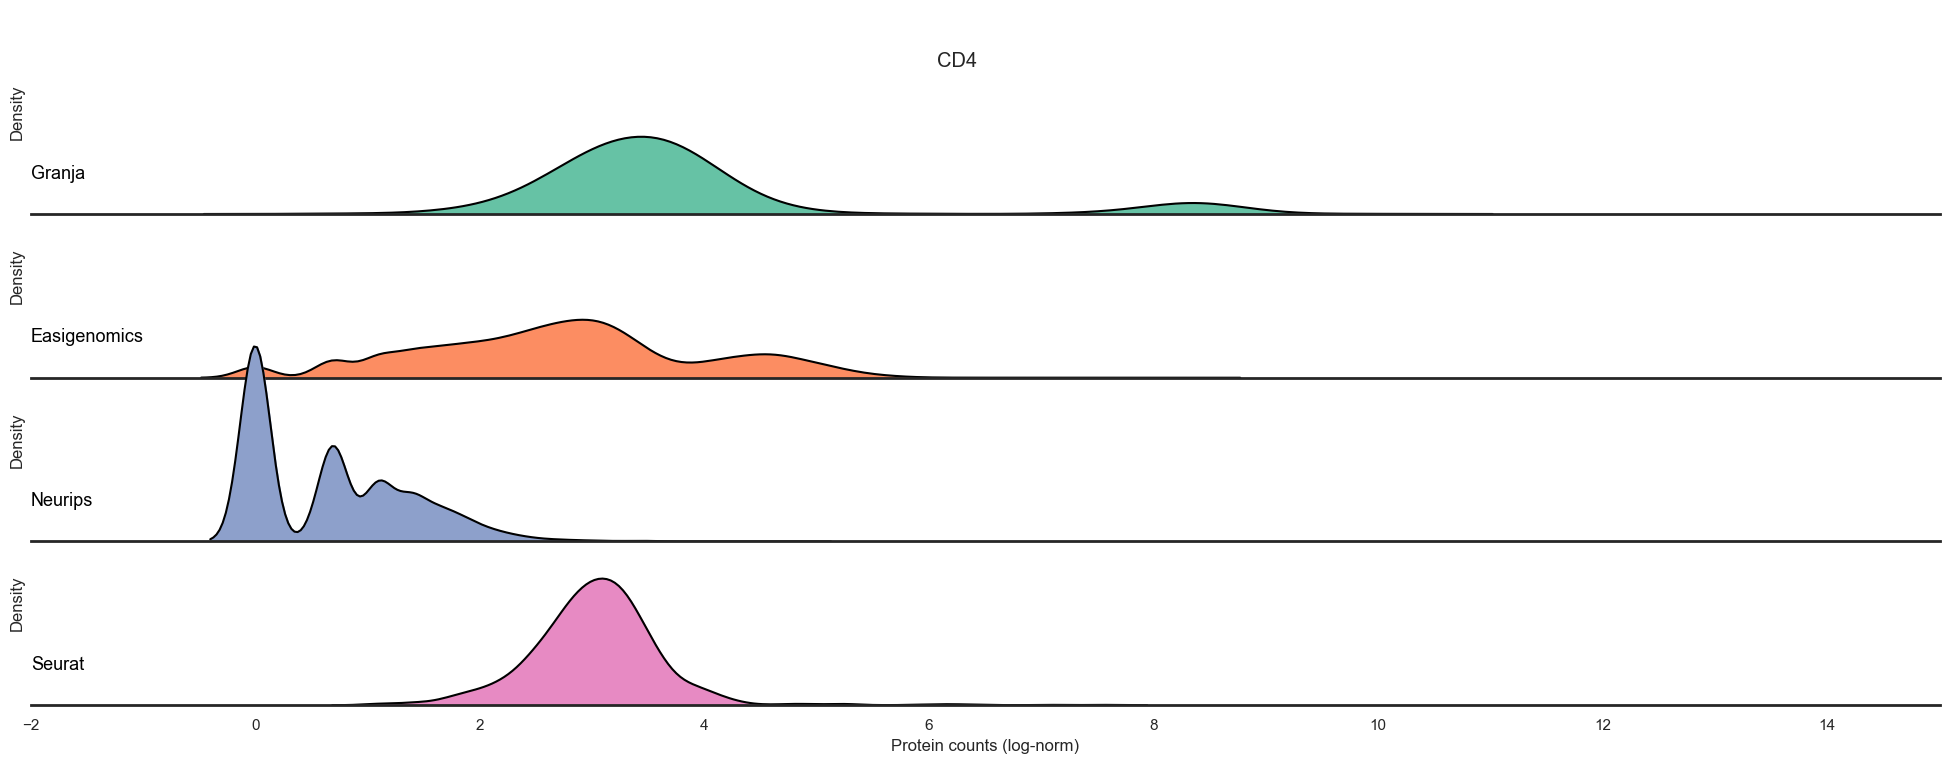

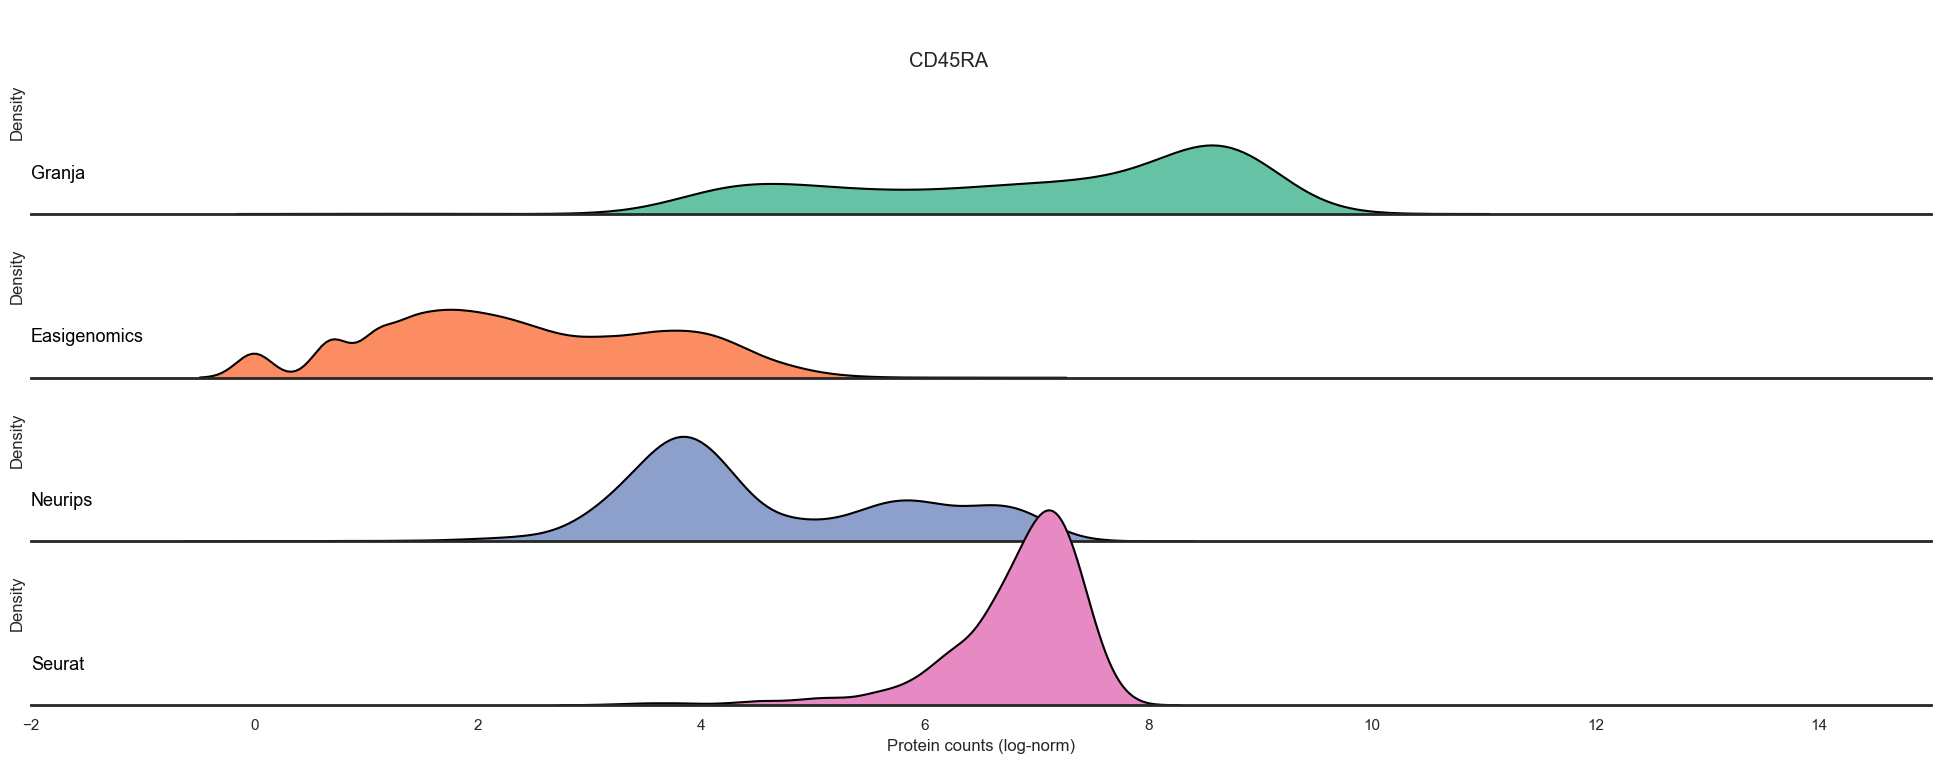

In [67]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

for marker in markers_all:
    g = sns.FacetGrid(df_nk, palette=palette, row="dataset", hue="dataset", aspect=10, height=2)

    g.map_dataframe(sns.kdeplot, x=marker, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=marker, color="black")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, "dataset")
    g.fig.subplots_adjust(hspace=-.2)
    g.set_titles("")
    g.set(yticks=[], xlabel="Protein counts (log-norm)")
    g.despine( left=True)

    plt.suptitle(marker, y=0.9)
    
    g.set(xlim=(-2, 15))